# WEATHER DATA

In [2]:
import pandas as pd
import json
import os
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import random
import numpy as np

In [3]:
# List of filenames
filenames = [
    "houston.json", "la.json", "nyc.json", "philadelphia.json",
    "phoenix.json", "san_antonio.json", "san_diego.json",
    "san_jose.json", "seattle.json" , "dallas.json"
]

# Function to load one JSON file
def load_city_data(file):
    city_name = file.replace(".json", "")
    with open(file, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    df['city'] = city_name
    df['timestamp'] = pd.to_datetime(df['time'], unit='s')
    return df

# Load and combine all
all_data = pd.concat([load_city_data(f) for f in filenames], ignore_index=True)

# Preview
all_data.head()


time summary         icon  precipIntensity  precipProbability  \
0  1530507600   Humid  clear-night              0.0                0.0   
1  1530511200   Humid  clear-night              0.0                0.0   
2  1530514800   Humid  clear-night              0.0                0.0   
3  1530518400   Humid  clear-night              0.0                0.0   
4  1530522000   Humid  clear-night              0.0                0.0   

   temperature  apparentTemperature  dewPoint  humidity  pressure  ...  \
0        81.87                87.88     74.15      0.78    1015.6  ...   
1        81.29                86.90     74.17      0.79    1015.4  ...   
2        80.34                85.34     74.47      0.82    1014.9  ...   
3        79.75                84.06     74.09      0.83    1014.8  ...   
4        79.23                83.02     74.02      0.84    1015.0  ...   

   windGust  windBearing  cloudCover  uvIndex  visibility  precipType ozone  \
0      9.31        191.0        0.01      0.0       8.479         NaN   NaN   
1      7.54        195.0        0.00      0.0       7.880         NaN   NaN   
2      5.49        218.0        0.00      0.0       8.751         NaN   NaN   
3      8.39        187.0        0.01      0.0       7.772         NaN   NaN   
4      4.25        210.0        0.05      0.0       7.772         NaN   NaN   

   precipAccumulation     city           timestamp  
0                 NaN  houston 2018-07-02 05:00:00  
1                 NaN  houston 2018-07-02 06:00:00  
2                 NaN  houston 2018-07-02 07:00:00  
3                 NaN  houston 2018-07-02 08:00:00  
4                 NaN  houston 2018-07-02 09:00:00  

[5 rows x 21 columns]

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165740 entries, 0 to 165739
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 165740 non-null  int64         
 1   summary              165463 non-null  object        
 2   icon                 165461 non-null  object        
 3   precipIntensity      165510 non-null  float64       
 4   precipProbability    165510 non-null  float64       
 5   temperature          165730 non-null  float64       
 6   apparentTemperature  165730 non-null  float64       
 7   dewPoint             165740 non-null  float64       
 8   humidity             165730 non-null  float64       
 9   pressure             165690 non-null  float64       
 10  windSpeed            165687 non-null  float64       
 11  windGust             165537 non-null  float64       
 12  windBearing          165685 non-null  float64       
 13  cloudCover    

In [5]:
all_data.tail(10)

time                  summary               icon  \
165730  1590174000  Humid and Partly Cloudy  partly-cloudy-day   
165731  1590177600  Humid and Partly Cloudy  partly-cloudy-day   
165732  1590181200  Humid and Partly Cloudy  partly-cloudy-day   
165733  1590184800  Humid and Partly Cloudy  partly-cloudy-day   
165734  1590188400  Humid and Partly Cloudy  partly-cloudy-day   
165735  1590192000  Humid and Partly Cloudy  partly-cloudy-day   
165736  1590195600  Humid and Partly Cloudy  partly-cloudy-day   
165737  1590199200                    Humid        clear-night   
165738  1590202800                    Humid        clear-night   
165739  1590206400                    Humid        clear-night   

        precipIntensity  precipProbability  temperature  apparentTemperature  \
165730           0.0003               0.01        87.30                96.28   
165731           0.0014               0.02        88.63                97.25   
165732           0.0024               0.04        89.54                98.09   
165733           0.0014               0.03        89.31                98.59   
165734           0.0019               0.03        88.88                98.15   
165735           0.0023               0.03        87.82                96.51   
165736           0.0023               0.04        85.99                93.66   
165737           0.0024               0.04        83.74                90.09   
165738           0.0037               0.05        82.07                87.47   
165739           0.0091               0.07        81.08                85.82   

        dewPoint  humidity  pressure  ...  windGust  windBearing  cloudCover  \
165730     74.46      0.66    1009.7  ...     20.73        194.0        0.42   
165731     73.69      0.61    1009.1  ...     19.49        194.0        0.41   
165732     73.35      0.59    1008.8  ...     18.97        189.0        0.39   
165733     74.10      0.61    1008.4  ...     19.82        179.0        0.55   
165734     74.21      0.62    1007.7  ...     21.16        171.0        0.52   
165735     74.01      0.64    1007.3  ...     22.64        165.0        0.46   
165736     73.63      0.67    1007.5  ...     24.25        164.0        0.34   
165737     73.15      0.71    1007.9  ...     25.85        163.0        0.20   
165738     72.93      0.74    1008.4  ...     27.11        163.0        0.12   
165739     72.74      0.76    1008.9  ...     28.39        168.0        0.25   

        uvIndex  visibility  precipType  ozone  precipAccumulation    city  \
165730      8.0        10.0        rain  302.9                 NaN  dallas   
165731      7.0        10.0        rain  302.6                 NaN  dallas   
165732      6.0        10.0        rain  302.7                 NaN  dallas   
165733      3.0        10.0        rain  303.9                 NaN  dallas   
165734      2.0        10.0        rain  305.4                 NaN  dallas   
165735      1.0        10.0        rain  305.9                 NaN  dallas   
165736      0.0        10.0        rain  304.2                 NaN  dallas   
165737      0.0        10.0        rain  301.3                 NaN  dallas   
165738      0.0        10.0        rain  299.2                 NaN  dallas   
165739      0.0        10.0        rain  298.8                 NaN  dallas   

                 timestamp  
165730 2020-05-22 19:00:00  
165731 2020-05-22 20:00:00  
165732 2020-05-22 21:00:00  
165733 2020-05-22 22:00:00  
165734 2020-05-22 23:00:00  
165735 2020-05-23 00:00:00  
165736 2020-05-23 01:00:00  
165737 2020-05-23 02:00:00  
165738 2020-05-23 03:00:00  
165739 2020-05-23 04:00:00  

[10 rows x 21 columns]

# Extracting Time Features

In [6]:
# Function to extract time components and season
def extract_time_features(row):
    dt = datetime.utcfromtimestamp(row['time'])
    hour = dt.hour
    day_of_week = dt.strftime('%A')  # Full weekday name
    month = dt.strftime('%B')        # Full month name
    month_num = dt.month

    # Map month to season
    if month_num in [12, 1, 2]:
        season = 'Winter'
    elif month_num in [3, 4, 5]:
        season = 'Spring'
    elif month_num in [6, 7, 8]:
        season = 'Summer'
    else:
        season = 'Autumn'

    return pd.Series([hour, day_of_week, month, season])

# Apply to the DataFrame
all_data[['hour', 'day_of_week', 'month', 'season']] = all_data.apply(extract_time_features, axis=1)

# Optional: display result
all_data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_16060\2620681414.py:3: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dt = datetime.utcfromtimestamp(row['time'])


time summary         icon  precipIntensity  precipProbability  \
0  1530507600   Humid  clear-night              0.0                0.0   
1  1530511200   Humid  clear-night              0.0                0.0   
2  1530514800   Humid  clear-night              0.0                0.0   
3  1530518400   Humid  clear-night              0.0                0.0   
4  1530522000   Humid  clear-night              0.0                0.0   

   temperature  apparentTemperature  dewPoint  humidity  pressure  ...  \
0        81.87                87.88     74.15      0.78    1015.6  ...   
1        81.29                86.90     74.17      0.79    1015.4  ...   
2        80.34                85.34     74.47      0.82    1014.9  ...   
3        79.75                84.06     74.09      0.83    1014.8  ...   
4        79.23                83.02     74.02      0.84    1015.0  ...   

   visibility  precipType  ozone  precipAccumulation     city  \
0       8.479         NaN    NaN                 NaN  houston   
1       7.880         NaN    NaN                 NaN  houston   
2       8.751         NaN    NaN                 NaN  houston   
3       7.772         NaN    NaN                 NaN  houston   
4       7.772         NaN    NaN                 NaN  houston   

            timestamp hour  day_of_week  month  season  
0 2018-07-02 05:00:00    5       Monday   July  Summer  
1 2018-07-02 06:00:00    6       Monday   July  Summer  
2 2018-07-02 07:00:00    7       Monday   July  Summer  
3 2018-07-02 08:00:00    8       Monday   July  Summer  
4 2018-07-02 09:00:00    9       Monday   July  Summer  

[5 rows x 25 columns]

In [7]:
all_data['time'] = all_data['timestamp']

In [8]:
all_data.head(7)

time summary         icon  precipIntensity  \
0 2018-07-02 05:00:00   Humid  clear-night              0.0   
1 2018-07-02 06:00:00   Humid  clear-night              0.0   
2 2018-07-02 07:00:00   Humid  clear-night              0.0   
3 2018-07-02 08:00:00   Humid  clear-night              0.0   
4 2018-07-02 09:00:00   Humid  clear-night              0.0   
5 2018-07-02 10:00:00   Humid  clear-night              0.0   
6 2018-07-02 11:00:00   Humid  clear-night              0.0   

   precipProbability  temperature  apparentTemperature  dewPoint  humidity  \
0                0.0        81.87                87.88     74.15      0.78   
1                0.0        81.29                86.90     74.17      0.79   
2                0.0        80.34                85.34     74.47      0.82   
3                0.0        79.75                84.06     74.09      0.83   
4                0.0        79.23                83.02     74.02      0.84   
5                0.0        78.94                82.42     73.95      0.85   
6                0.0        78.94                82.41     73.85      0.84   

   pressure  ...  visibility  precipType  ozone  precipAccumulation     city  \
0    1015.6  ...       8.479         NaN    NaN                 NaN  houston   
1    1015.4  ...       7.880         NaN    NaN                 NaN  houston   
2    1014.9  ...       8.751         NaN    NaN                 NaN  houston   
3    1014.8  ...       7.772         NaN    NaN                 NaN  houston   
4    1015.0  ...       7.772         NaN    NaN                 NaN  houston   
5    1015.3  ...       7.828         NaN    NaN                 NaN  houston   
6    1015.7  ...       7.392         NaN    NaN                 NaN  houston   

            timestamp hour  day_of_week  month  season  
0 2018-07-02 05:00:00    5       Monday   July  Summer  
1 2018-07-02 06:00:00    6       Monday   July  Summer  
2 2018-07-02 07:00:00    7       Monday   July  Summer  
3 2018-07-02 08:00:00    8       Monday   July  Summer  
4 2018-07-02 09:00:00    9       Monday   July  Summer  
5 2018-07-02 10:00:00   10       Monday   July  Summer  
6 2018-07-02 11:00:00   11       Monday   July  Summer  

[7 rows x 25 columns]

# Impute Missing Values

In [9]:
missing_summary = all_data.isnull().sum()
missing_ratio = (all_data.isnull().mean() * 100).sort_values(ascending=False)
print(pd.concat([missing_summary, missing_ratio], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
time                             0   0.000000
summary                        277   0.167129
icon                           279   0.168336
precipIntensity                230   0.138772
precipProbability              230   0.138772
temperature                     10   0.006034
apparentTemperature             10   0.006034
dewPoint                         0   0.000000
humidity                        10   0.006034
pressure                        50   0.030168
windSpeed                       53   0.031978
windGust                       203   0.122481
windBearing                     55   0.033185
cloudCover                     240   0.144805
uvIndex                        175   0.105587
visibility                     172   0.103777
precipType                   87135  52.573308
ozone                        20202  12.188971
precipAccumulation          163637  98.731145
city                             0   0.000000
timestamp                        0

In [10]:
remove_columns = ['precipAccumulation', 'precipType','ozone', 'timestamp']

all_data.drop(columns=remove_columns, inplace=True, errors='ignore')

In [11]:
all_data.head(7)

time summary         icon  precipIntensity  \
0 2018-07-02 05:00:00   Humid  clear-night              0.0   
1 2018-07-02 06:00:00   Humid  clear-night              0.0   
2 2018-07-02 07:00:00   Humid  clear-night              0.0   
3 2018-07-02 08:00:00   Humid  clear-night              0.0   
4 2018-07-02 09:00:00   Humid  clear-night              0.0   
5 2018-07-02 10:00:00   Humid  clear-night              0.0   
6 2018-07-02 11:00:00   Humid  clear-night              0.0   

   precipProbability  temperature  apparentTemperature  dewPoint  humidity  \
0                0.0        81.87                87.88     74.15      0.78   
1                0.0        81.29                86.90     74.17      0.79   
2                0.0        80.34                85.34     74.47      0.82   
3                0.0        79.75                84.06     74.09      0.83   
4                0.0        79.23                83.02     74.02      0.84   
5                0.0        78.94                82.42     73.95      0.85   
6                0.0        78.94                82.41     73.85      0.84   

   pressure  ...  windGust  windBearing  cloudCover  uvIndex  visibility  \
0    1015.6  ...      9.31        191.0        0.01      0.0       8.479   
1    1015.4  ...      7.54        195.0        0.00      0.0       7.880   
2    1014.9  ...      5.49        218.0        0.00      0.0       8.751   
3    1014.8  ...      8.39        187.0        0.01      0.0       7.772   
4    1015.0  ...      4.25        210.0        0.05      0.0       7.772   
5    1015.3  ...      0.85        186.0        0.25      0.0       7.828   
6    1015.7  ...      0.66        212.0        0.18      0.0       7.392   

      city hour  day_of_week month  season  
0  houston    5       Monday  July  Summer  
1  houston    6       Monday  July  Summer  
2  houston    7       Monday  July  Summer  
3  houston    8       Monday  July  Summer  
4  houston    9       Monday  July  Summer  
5  houston   10       Monday  July  Summer  
6  houston   11       Monday  July  Summer  

[7 rows x 21 columns]

In [12]:
all_data['summary'].unique()

array(['Humid', 'Humid and Mostly Cloudy', 'Partly Cloudy', 'Clear',
       'Humid and Partly Cloudy', 'Mostly Cloudy', 'Humid and Overcast',
       'Rain and Humid', 'Heavy Rain and Humid', 'Heavy Rain', 'Rain',
       'Possible Drizzle', 'Possible Light Rain and Humid',
       'Possible Drizzle and Humid', 'Light Rain and Humid', nan,
       'Possible Light Rain', 'Overcast', 'Light Rain', 'Foggy',
       'Rain and Windy', 'Possible Light Rain and Windy',
       'Windy and Overcast', 'Drizzle and Humid', 'Drizzle', 'Snow',
       'Heavy Snow', 'Possible Light Snow', 'Possible Flurries',
       'Windy and Partly Cloudy', 'Windy',
       'Dangerously Windy and Partly Cloudy',
       'Dangerously Windy and Overcast', 'Possible Drizzle and Windy',
       'Windy and Mostly Cloudy', 'Rain and Dangerously Windy',
       'Humid and Foggy', 'Possible Light Rain and Dangerously Windy',
       'Light Rain and Windy', 'Heavy Rain and Windy'], dtype=object)

In [13]:
# Calculate mean temperature for each season
season_mean_temp = all_data.groupby('season')['temperature'].mean()

# Fill missing temperature values based on the season
all_data['temperature'] = all_data.apply(
    lambda row: season_mean_temp[row['season']] if pd.isna(row['temperature']) else row['temperature'],
    axis=1
)

# Display the updated DataFrame
all_data.head()

time summary         icon  precipIntensity  \
0 2018-07-02 05:00:00   Humid  clear-night              0.0   
1 2018-07-02 06:00:00   Humid  clear-night              0.0   
2 2018-07-02 07:00:00   Humid  clear-night              0.0   
3 2018-07-02 08:00:00   Humid  clear-night              0.0   
4 2018-07-02 09:00:00   Humid  clear-night              0.0   

   precipProbability  temperature  apparentTemperature  dewPoint  humidity  \
0                0.0        81.87                87.88     74.15      0.78   
1                0.0        81.29                86.90     74.17      0.79   
2                0.0        80.34                85.34     74.47      0.82   
3                0.0        79.75                84.06     74.09      0.83   
4                0.0        79.23                83.02     74.02      0.84   

   pressure  ...  windGust  windBearing  cloudCover  uvIndex  visibility  \
0    1015.6  ...      9.31        191.0        0.01      0.0       8.479   
1    1015.4  ...      7.54        195.0        0.00      0.0       7.880   
2    1014.9  ...      5.49        218.0        0.00      0.0       8.751   
3    1014.8  ...      8.39        187.0        0.01      0.0       7.772   
4    1015.0  ...      4.25        210.0        0.05      0.0       7.772   

      city hour  day_of_week month  season  
0  houston    5       Monday  July  Summer  
1  houston    6       Monday  July  Summer  
2  houston    7       Monday  July  Summer  
3  houston    8       Monday  July  Summer  
4  houston    9       Monday  July  Summer  

[5 rows x 21 columns]

In [14]:
# Fill missing apparentTemperature values
all_data['apparentTemperature'] = all_data.apply(
    lambda row: row['temperature'] + random.choice([4, 5, 3, 6, 7]) if pd.isna(row['apparentTemperature']) else row['apparentTemperature'],
    axis=1
)
# Display the updated DataFrame
all_data.head()


time summary         icon  precipIntensity  \
0 2018-07-02 05:00:00   Humid  clear-night              0.0   
1 2018-07-02 06:00:00   Humid  clear-night              0.0   
2 2018-07-02 07:00:00   Humid  clear-night              0.0   
3 2018-07-02 08:00:00   Humid  clear-night              0.0   
4 2018-07-02 09:00:00   Humid  clear-night              0.0   

   precipProbability  temperature  apparentTemperature  dewPoint  humidity  \
0                0.0        81.87                87.88     74.15      0.78   
1                0.0        81.29                86.90     74.17      0.79   
2                0.0        80.34                85.34     74.47      0.82   
3                0.0        79.75                84.06     74.09      0.83   
4                0.0        79.23                83.02     74.02      0.84   

   pressure  ...  windGust  windBearing  cloudCover  uvIndex  visibility  \
0    1015.6  ...      9.31        191.0        0.01      0.0       8.479   
1    1015.4  ...      7.54        195.0        0.00      0.0       7.880   
2    1014.9  ...      5.49        218.0        0.00      0.0       8.751   
3    1014.8  ...      8.39        187.0        0.01      0.0       7.772   
4    1015.0  ...      4.25        210.0        0.05      0.0       7.772   

      city hour  day_of_week month  season  
0  houston    5       Monday  July  Summer  
1  houston    6       Monday  July  Summer  
2  houston    7       Monday  July  Summer  
3  houston    8       Monday  July  Summer  
4  houston    9       Monday  July  Summer  

[5 rows x 21 columns]

In [15]:
missing_summary = all_data.isnull().sum()
missing_ratio = (all_data.isnull().mean() * 100).sort_values(ascending=False)
print(pd.concat([missing_summary, missing_ratio], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
time                             0   0.000000
summary                        277   0.167129
icon                           279   0.168336
precipIntensity                230   0.138772
precipProbability              230   0.138772
temperature                      0   0.000000
apparentTemperature              0   0.000000
dewPoint                         0   0.000000
humidity                        10   0.006034
pressure                        50   0.030168
windSpeed                       53   0.031978
windGust                       203   0.122481
windBearing                     55   0.033185
cloudCover                     240   0.144805
uvIndex                        175   0.105587
visibility                     172   0.103777
city                             0   0.000000
hour                             0   0.000000
day_of_week                      0   0.000000
month                            0   0.000000
season                           0

In [16]:
all_data.iloc[250:261]

time                        summary               icon  \
250 2018-07-12 15:00:00        Humid and Partly Cloudy  partly-cloudy-day   
251 2018-07-12 16:00:00        Humid and Partly Cloudy  partly-cloudy-day   
252 2018-07-12 17:00:00        Humid and Partly Cloudy  partly-cloudy-day   
253 2018-07-12 18:00:00                  Partly Cloudy  partly-cloudy-day   
254 2018-07-12 19:00:00                  Partly Cloudy  partly-cloudy-day   
255 2018-07-12 20:00:00                  Partly Cloudy  partly-cloudy-day   
256 2018-07-12 21:00:00                  Partly Cloudy  partly-cloudy-day   
257 2018-07-12 22:00:00        Humid and Partly Cloudy  partly-cloudy-day   
258 2018-07-12 23:00:00        Humid and Mostly Cloudy  partly-cloudy-day   
259 2018-07-13 00:00:00                 Rain and Humid               rain   
260 2018-07-13 01:00:00  Possible Light Rain and Humid               rain   

     precipIntensity  precipProbability  temperature  apparentTemperature  \
250           0.0000               0.00        81.95                88.43   
251           0.0000               0.00        86.02                92.73   
252           0.0000               0.00        87.69                95.50   
253           0.0000               0.00        90.48                95.96   
254           0.0000               0.00        91.20                97.19   
255           0.0000               0.00        94.03               100.77   
256           0.0000               0.00        92.60                99.11   
257           0.0000               0.00        91.12                99.80   
258           0.0072               0.08        89.76                98.96   
259           0.1089               0.48        82.92                89.12   
260           0.0265               0.43        82.02                88.78   

     dewPoint  humidity  pressure  ...  windGust  windBearing  cloudCover  \
250     74.81      0.79    1018.4  ...      6.20        250.0        0.58   
251     72.53      0.64    1018.5  ...      2.75        234.0        0.38   
252     73.17      0.62    1018.6  ...      6.00        206.0        0.57   
253     69.86      0.51    1018.3  ...      2.54        193.0        0.32   
254     70.27      0.51    1017.8  ...      2.64        205.0        0.58   
255     70.42      0.46    1016.9  ...      2.64        211.0        0.55   
256     70.52      0.49    1016.3  ...      7.76        162.0        0.58   
257     73.05      0.56    1015.8  ...      8.55        166.0        0.56   
258     73.90      0.60    1015.9  ...      9.92        170.0        0.65   
259     73.50      0.73    1016.0  ...      4.41        143.0        0.58   
260     75.15      0.80    1016.7  ...      3.71        171.0        0.56   

     uvIndex  visibility     city hour  day_of_week month  season  
250      4.0       9.997  houston   15     Thursday  July  Summer  
251      6.0       9.997  houston   16     Thursday  July  Summer  
252      7.0       9.997  houston   17     Thursday  July  Summer  
253      9.0       9.997  houston   18     Thursday  July  Summer  
254      7.0       9.997  houston   19     Thursday  July  Summer  
255      7.0       9.997  houston   20     Thursday  July  Summer  
256      5.0       9.997  houston   21     Thursday  July  Summer  
257      4.0       9.997  houston   22     Thursday  July  Summer  
258      2.0       9.159  houston   23     Thursday  July  Summer  
259      1.0       5.555  houston    0       Friday  July  Summer  
260      0.0       9.050  houston    1       Friday  July  Summer  

[11 rows x 21 columns]

In [17]:
# Step 1: Get unique summary/icon values for each season
season_summaries = all_data.groupby("season")["summary"].apply(lambda x: x.dropna().unique())
season_icons = all_data.groupby("season")["icon"].apply(lambda x: x.dropna().unique())

# Step 2: Define fill functions
def fill_summary(row):
    if pd.isnull(row['summary']):
        return np.random.choice(season_summaries[row['season']])
    return row['summary']

def fill_icon(row):
    if pd.isnull(row['icon']):
        return np.random.choice(season_icons[row['season']])
    return row['icon']

# Step 3: Apply the functions row-wise
all_data['summary'] = all_data.apply(fill_summary, axis=1)
all_data['icon'] = all_data.apply(fill_icon, axis=1)

In [18]:
missing_summary = all_data.isnull().sum()
missing_ratio = (all_data.isnull().mean() * 100).sort_values(ascending=False)
print(pd.concat([missing_summary, missing_ratio], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
time                             0   0.000000
summary                          0   0.000000
icon                             0   0.000000
precipIntensity                230   0.138772
precipProbability              230   0.138772
temperature                      0   0.000000
apparentTemperature              0   0.000000
dewPoint                         0   0.000000
humidity                        10   0.006034
pressure                        50   0.030168
windSpeed                       53   0.031978
windGust                       203   0.122481
windBearing                     55   0.033185
cloudCover                     240   0.144805
uvIndex                        175   0.105587
visibility                     172   0.103777
city                             0   0.000000
hour                             0   0.000000
day_of_week                      0   0.000000
month                            0   0.000000
season                           0

In [19]:
selected_columns = [
    'pressure', 'windSpeed', 'humidity', 'temperature', 'apparentTemperature',
    'city', 'hour', 'day_of_week', 'month', 'season', 'time', 'summary',
    'icon', 'cloudCover', 'precipProbability'
]

all_data = all_data[selected_columns]
all_data.head()


pressure  windSpeed  humidity  temperature  apparentTemperature     city  \
0    1015.6       5.45      0.78        81.87                87.88  houston   
1    1015.4       5.30      0.79        81.29                86.90  houston   
2    1014.9       5.49      0.82        80.34                85.34  houston   
3    1014.8       3.53      0.83        79.75                84.06  houston   
4    1015.0       4.25      0.84        79.23                83.02  houston   

   hour day_of_week month  season                time summary         icon  \
0     5      Monday  July  Summer 2018-07-02 05:00:00   Humid  clear-night   
1     6      Monday  July  Summer 2018-07-02 06:00:00   Humid  clear-night   
2     7      Monday  July  Summer 2018-07-02 07:00:00   Humid  clear-night   
3     8      Monday  July  Summer 2018-07-02 08:00:00   Humid  clear-night   
4     9      Monday  July  Summer 2018-07-02 09:00:00   Humid  clear-night   

   cloudCover  precipProbability  
0        0.01                0.0  
1        0.00                0.0  
2        0.00                0.0  
3        0.01                0.0  
4        0.05                0.0

In [20]:
missing_summary = all_data.isnull().sum()
missing_ratio = (all_data.isnull().mean() * 100).sort_values(ascending=False)
print(pd.concat([missing_summary, missing_ratio], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
pressure                        50   0.030168
windSpeed                       53   0.031978
humidity                        10   0.006034
temperature                      0   0.000000
apparentTemperature              0   0.000000
city                             0   0.000000
hour                             0   0.000000
day_of_week                      0   0.000000
month                            0   0.000000
season                           0   0.000000
time                             0   0.000000
summary                          0   0.000000
icon                             0   0.000000
cloudCover                     240   0.144805
precipProbability              230   0.138772


In [21]:
def fill_null_with_avg(column_name):
    def fill_value(row):
        if pd.isnull(row[column_name]):
            city_data = all_data[all_data['city'] == row['city']]
            idx = city_data.index.get_loc(row.name)
            start = max(0, idx - 10)
            end = min(len(city_data), idx + 11)
            avg_value = city_data.iloc[start:end][column_name].mean()
            return avg_value
        return row[column_name]

    all_data[column_name] = all_data.apply(fill_value, axis=1)

# Fill null values for the specified columns
fill_null_with_avg('pressure')
fill_null_with_avg('windSpeed')
fill_null_with_avg('humidity')


In [22]:
missing_summary = all_data.isnull().sum()
missing_ratio = (all_data.isnull().mean() * 100).sort_values(ascending=False)
print(pd.concat([missing_summary, missing_ratio], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
pressure                         0   0.000000
windSpeed                        0   0.000000
humidity                         0   0.000000
temperature                      0   0.000000
apparentTemperature              0   0.000000
city                             0   0.000000
hour                             0   0.000000
day_of_week                      0   0.000000
month                            0   0.000000
season                           0   0.000000
time                             0   0.000000
summary                          0   0.000000
icon                             0   0.000000
cloudCover                     240   0.144805
precipProbability              230   0.138772


In [23]:
def fill_null_with_avg1(column_name):
    def fill_value(row):
        if pd.isnull(row[column_name]):
            city_data = all_data[all_data['city'] == row['city']]
            idx = city_data.index.get_loc(row.name)
            start = max(0, idx - 5)
            end = min(len(city_data), idx + 6)
            relevant_data = city_data.iloc[start:end][column_name].fillna(0)  
            avg_value = relevant_data.mean()
            return avg_value
        return row[column_name]

    all_data[column_name] = all_data.apply(fill_value, axis=1)

# Fill null values for the specified columns
fill_null_with_avg1('cloudCover')
fill_null_with_avg1('precipProbability')


In [24]:
missing_summary = all_data.isnull().sum()
missing_ratio = (all_data.isnull().mean() * 100).sort_values(ascending=False)
print(pd.concat([missing_summary, missing_ratio], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
pressure                         0        0.0
windSpeed                        0        0.0
humidity                         0        0.0
temperature                      0        0.0
apparentTemperature              0        0.0
city                             0        0.0
hour                             0        0.0
day_of_week                      0        0.0
month                            0        0.0
season                           0        0.0
time                             0        0.0
summary                          0        0.0
icon                             0        0.0
cloudCover                       0        0.0
precipProbability                0        0.0


# ELECTRICITY DATA

In [25]:
balance_data = pd.read_csv("cleaned_balance_data.csv")

# Rename utc_time to match the all_data column 'time'
balance_data = balance_data.rename(columns={'utc_time': 'time'})

# Ensure the time columns are in datetime format
balance_data['time'] = pd.to_datetime(balance_data['time'])
all_data['time'] = pd.to_datetime(all_data['time'])

# Drop rows with null demand values
balance_data = balance_data.dropna(subset=['demand'])

# Merge on both 'city' and 'time'
merged_data = pd.merge(all_data, balance_data[['city', 'time', 'demand']],
                       on=['city', 'time'], how='left')

In [26]:
merged_data[merged_data['city'].isin(['phoenix', 'seattle'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature  \
66296    1008.9       4.30      0.16        86.82                86.82   
66297    1009.3       4.00      0.19        83.37                83.37   
66298    1009.5       2.47      0.18        82.22                82.22   
66299    1010.1       2.98      0.19        80.34                80.34   
66300    1010.4       2.74      0.18        79.34                79.34   

          city  hour day_of_week month  season                time summary  \
66296  phoenix     7      Sunday  July  Summer 2018-07-01 07:00:00   Clear   
66297  phoenix     8      Sunday  July  Summer 2018-07-01 08:00:00   Clear   
66298  phoenix     9      Sunday  July  Summer 2018-07-01 09:00:00   Clear   
66299  phoenix    10      Sunday  July  Summer 2018-07-01 10:00:00   Clear   
66300  phoenix    11      Sunday  July  Summer 2018-07-01 11:00:00   Clear   

              icon  cloudCover  precipProbability  demand  
66296  clear-night         0.0                0.0     NaN  
66297  clear-night         0.0                0.0  3497.0  
66298  clear-night         0.0                0.0  3256.0  
66299  clear-night         0.0                0.0  3065.0  
66300  clear-night         0.0                0.0  2929.0

In [27]:
# Filter rows where city is phoenix
phoenix_data = merged_data[merged_data['city'] == 'phoenix']

# Calculate missing values summary
missing_summary_phoenix = phoenix_data.isnull().sum()
missing_ratio_phoenix = (phoenix_data.isnull().mean() * 100).sort_values(ascending=False)

# Print the summary
print(pd.concat([missing_summary_phoenix, missing_ratio_phoenix], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
pressure                         0   0.000000
windSpeed                        0   0.000000
humidity                         0   0.000000
temperature                      0   0.000000
apparentTemperature              0   0.000000
city                             0   0.000000
hour                             0   0.000000
day_of_week                      0   0.000000
month                            0   0.000000
season                           0   0.000000
time                             0   0.000000
summary                          0   0.000000
icon                             0   0.000000
cloudCover                       0   0.000000
precipProbability                0   0.000000
demand                         648   3.909738


In [28]:
# Calculate the mean demand for the city 'phoenix'
phoenix_mean_demand = phoenix_data['demand'].mean()

# Fill missing demand values for the city 'phoenix' with the calculated mean
phoenix_data['demand'] = phoenix_data['demand'].fillna(phoenix_mean_demand)

# Update the merged_data DataFrame with the filled values
merged_data.loc[merged_data['city'] == 'phoenix', 'demand'] = phoenix_data['demand']


C:\Users\hp\AppData\Local\Temp\ipykernel_16060\4080126588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phoenix_data['demand'] = phoenix_data['demand'].fillna(phoenix_mean_demand)


In [29]:
# Calculate missing values summary
missing_summary_phoenix = phoenix_data.isnull().sum()
missing_ratio_phoenix = (phoenix_data.isnull().mean() * 100).sort_values(ascending=False)

# Print the summary
print(pd.concat([missing_summary_phoenix, missing_ratio_phoenix], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
pressure                         0        0.0
windSpeed                        0        0.0
humidity                         0        0.0
temperature                      0        0.0
apparentTemperature              0        0.0
city                             0        0.0
hour                             0        0.0
day_of_week                      0        0.0
month                            0        0.0
season                           0        0.0
time                             0        0.0
summary                          0        0.0
icon                             0        0.0
cloudCover                       0        0.0
precipProbability                0        0.0
demand                           0        0.0


In [30]:
# Filter rows where city is phoenix
seattle_data = merged_data[merged_data['city'] == 'seattle']

# Calculate missing values summary
missing_summary_seattle = seattle_data.isnull().sum()
missing_ratio_seattle = (seattle_data.isnull().mean() * 100).sort_values(ascending=False)

# Print the summary
print(pd.concat([missing_summary_seattle, missing_ratio_seattle], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
pressure                         0   0.000000
windSpeed                        0   0.000000
humidity                         0   0.000000
temperature                      0   0.000000
apparentTemperature              0   0.000000
city                             0   0.000000
hour                             0   0.000000
day_of_week                      0   0.000000
month                            0   0.000000
season                           0   0.000000
time                             0   0.000000
summary                          0   0.000000
icon                             0   0.000000
cloudCover                       0   0.000000
precipProbability                0   0.000000
demand                         676   4.078677


In [31]:
# Calculate the mean demand for the city 'phoenix'
seattle_mean_demand = seattle_data['demand'].mean()

# Fill missing demand values for the city 'phoenix' with the calculated mean
seattle_data['demand'] = seattle_data['demand'].fillna(seattle_mean_demand)

# Update the merged_data DataFrame with the filled values
merged_data.loc[merged_data['city'] == 'seattle', 'demand'] = seattle_data['demand']


C:\Users\hp\AppData\Local\Temp\ipykernel_16060\3571430808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_data['demand'] = seattle_data['demand'].fillna(seattle_mean_demand)


In [32]:
# Calculate missing values summary
missing_summary_seattle = seattle_data.isnull().sum()
missing_ratio_seattle = (seattle_data.isnull().mean() * 100).sort_values(ascending=False)

# Print the summary
print(pd.concat([missing_summary_seattle, missing_ratio_seattle], axis=1, keys=["Missing Count", "Missing %"]))

                     Missing Count  Missing %
pressure                         0        0.0
windSpeed                        0        0.0
humidity                         0        0.0
temperature                      0        0.0
apparentTemperature              0        0.0
city                             0        0.0
hour                             0        0.0
day_of_week                      0        0.0
month                            0        0.0
season                           0        0.0
time                             0        0.0
summary                          0        0.0
icon                             0        0.0
cloudCover                       0        0.0
precipProbability                0        0.0
demand                           0        0.0


In [33]:
subregion_data = pd.read_csv("cleaned_subregion_data.csv")

# Rename utc_time to match the all_data column 'time'
subregion_data = subregion_data.rename(columns={'utc_time': 'time'})

# Normalize time format
subregion_data['time'] = pd.to_datetime(subregion_data['time'])

# Drop rows with null demand values
subregion_data = subregion_data.dropna(subset=['demand'])

# Normalize city names in merged_data to match subregion_data
merged_data['city'] = merged_data['city'].str.replace('_', ' ').str.lower()

# (Optional) normalize city names in subregion_data as well, for consistency
subregion_data['city'] = subregion_data['city'].str.lower()

# Merge and update demand
merged_data = pd.merge(
    merged_data,
    subregion_data[['city', 'time', 'demand']],
    on=['city', 'time'],
    how='left',
    suffixes=('', '_new')
)

merged_data['demand'] = merged_data['demand_new'].combine_first(merged_data['demand'])

merged_data.drop(columns=['demand_new'], inplace=True)


In [34]:
merged_data[merged_data['city'].isin(['la'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature city  \
16574    1014.5       4.23      0.79        65.45                65.45   la   
16575    1014.4       3.95      0.79        65.16                65.16   la   
16576    1014.1       4.21      0.80        64.58                64.58   la   
16577    1013.9       4.01      0.79        64.46                64.46   la   
16578    1014.1       3.81      0.80        64.19                64.19   la   

       hour day_of_week month  season                time   summary  \
16574     7      Sunday  July  Summer 2018-07-01 07:00:00     Clear   
16575     8      Sunday  July  Summer 2018-07-01 08:00:00  Overcast   
16576     9      Sunday  July  Summer 2018-07-01 09:00:00  Overcast   
16577    10      Sunday  July  Summer 2018-07-01 10:00:00  Overcast   
16578    11      Sunday  July  Summer 2018-07-01 11:00:00  Overcast   

              icon  cloudCover  precipProbability   demand  
16574  clear-night        0.25                0.0      NaN  
16575       cloudy        0.88                0.0  10681.0  
16576       cloudy        0.92                0.0  10197.0  
16577       cloudy        0.99                0.0   9776.0  
16578       cloudy        1.00                0.0   9508.0

In [35]:
merged_data[merged_data['city'].isin(['nyc'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature city  \
33148    1017.0       3.27      0.67        83.18                87.93  nyc   
33149    1017.2       2.40      0.66        82.55                86.45  nyc   
33150    1017.4       3.64      0.71        79.89                82.86  nyc   
33151    1017.3       5.51      0.72        79.07                81.70  nyc   
33152    1017.2       1.95      0.74        78.12                79.12  nyc   

       hour day_of_week month  season                time summary  \
33148     4      Monday  July  Summer 2018-07-02 04:00:00   Clear   
33149     5      Monday  July  Summer 2018-07-02 05:00:00   Clear   
33150     6      Monday  July  Summer 2018-07-02 06:00:00   Clear   
33151     7      Monday  July  Summer 2018-07-02 07:00:00   Clear   
33152     8      Monday  July  Summer 2018-07-02 08:00:00   Clear   

              icon  cloudCover  precipProbability  demand  
33148  clear-night        0.03                0.0  8548.0  
33149  clear-night        0.02                0.0  8153.0  
33150  clear-night        0.02                0.0  7824.0  
33151  clear-night        0.02                0.0  7541.0  
33152  clear-night        0.02                0.0  7368.0

In [36]:
merged_data[merged_data['city'].isin(['philadelphia'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature  \
49722    1017.3       3.03      0.73        80.27                83.79   
49723    1017.2       2.39      0.71        79.74                82.67   
49724    1017.6       1.78      0.75        78.14                79.19   
49725    1017.6       0.95      0.79        76.94                78.02   
49726    1017.5       1.23      0.81        76.07                77.20   

               city  hour day_of_week month  season                time  \
49722  philadelphia     4      Monday  July  Summer 2018-07-02 04:00:00   
49723  philadelphia     5      Monday  July  Summer 2018-07-02 05:00:00   
49724  philadelphia     6      Monday  July  Summer 2018-07-02 06:00:00   
49725  philadelphia     7      Monday  July  Summer 2018-07-02 07:00:00   
49726  philadelphia     8      Monday  July  Summer 2018-07-02 08:00:00   

      summary         icon  cloudCover  precipProbability  demand  
49722   Clear  clear-night        0.12                0.0  4774.0  
49723   Clear  clear-night        0.05                0.0  4397.0  
49724   Clear  clear-night        0.20                0.0  4423.0  
49725   Clear  clear-night        0.12                0.0  4743.0  
49726   Clear  clear-night        0.05                0.0  5230.0

In [37]:
merged_data[merged_data['city'].isin(['san jose'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature  \
116018    1012.8       6.36      0.60        67.78                67.78   
116019    1013.1       3.15      0.63        66.09                66.09   
116020    1013.0       4.74      0.67        64.30                64.30   
116021    1012.9       4.51      0.69        63.42                63.42   
116022    1013.0       3.48      0.73        61.73                61.73   

            city  hour day_of_week month  season                time summary  \
116018  san jose     7      Sunday  July  Summer 2018-07-01 07:00:00   Clear   
116019  san jose     8      Sunday  July  Summer 2018-07-01 08:00:00   Clear   
116020  san jose     9      Sunday  July  Summer 2018-07-01 09:00:00   Clear   
116021  san jose    10      Sunday  July  Summer 2018-07-01 10:00:00   Clear   
116022  san jose    11      Sunday  July  Summer 2018-07-01 11:00:00   Clear   

               icon  cloudCover  precipProbability   demand  
116018  clear-night        0.17                0.0      NaN  
116019  clear-night        0.01                0.0  12522.0  
116020  clear-night        0.00                0.0  11745.0  
116021  clear-night        0.06                0.0  11200.0  
116022  clear-night        0.08                0.0  10822.0

In [38]:
merged_data[merged_data['city'].isin(['san diego'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature  \
99444    1015.9       3.53      0.80        61.71                61.71   
99445    1015.7       3.06      0.79        62.26                62.26   
99446    1015.3       4.34      0.79        62.27                62.27   
99447    1015.0       3.91      0.78        62.13                62.13   
99448    1015.2       3.37      0.82        61.52                61.52   

            city  hour day_of_week month  season                time  \
99444  san diego     7      Sunday  July  Summer 2018-07-01 07:00:00   
99445  san diego     8      Sunday  July  Summer 2018-07-01 08:00:00   
99446  san diego     9      Sunday  July  Summer 2018-07-01 09:00:00   
99447  san diego    10      Sunday  July  Summer 2018-07-01 10:00:00   
99448  san diego    11      Sunday  July  Summer 2018-07-01 11:00:00   

        summary    icon  cloudCover  precipProbability  demand  
99444  Overcast  cloudy        1.00                0.0     NaN  
99445  Overcast  cloudy        1.00                0.0  2023.0  
99446  Overcast  cloudy        1.00                0.0  1896.0  
99447  Overcast  cloudy        0.99                0.0  1857.0  
99448  Overcast  cloudy        1.00                0.0  1825.0

In [39]:
def calculate_missing_summary_for_cities(data, cities):
    for city in cities:
        city_data = data[data['city'] == city]
        missing_summary = city_data.isnull().sum()
        missing_ratio = (city_data.isnull().mean() * 100).sort_values(ascending=False)
        print(f"Missing values summary for {city}:")
        print(pd.concat([missing_summary, missing_ratio], axis=1, keys=["Missing Count", "Missing %"]))
        print("\n")
        
# List of cities
cities = ['san jose', 'la', 'nyc', 'san diego', 'philadelphia']

# Call the function
calculate_missing_summary_for_cities(merged_data, cities)

Missing values summary for san jose:
                     Missing Count  Missing %
pressure                         0   0.000000
windSpeed                        0   0.000000
humidity                         0   0.000000
temperature                      0   0.000000
apparentTemperature              0   0.000000
city                             0   0.000000
hour                             0   0.000000
day_of_week                      0   0.000000
month                            0   0.000000
season                           0   0.000000
time                             0   0.000000
summary                          0   0.000000
icon                             0   0.000000
cloudCover                       0   0.000000
precipProbability                0   0.000000
demand                         153   0.923133


Missing values summary for la:
                     Missing Count  Missing %
pressure                         0   0.000000
windSpeed                        0   0.000000
humidity  

In [40]:
# Fill missing demand values with the average demand for each city
merged_data['demand'] = merged_data.groupby('city')['demand'].transform(lambda x: x.fillna(x.mean()))


# List of cities
cities = ['san jose', 'la', 'nyc', 'san diego', 'philadelphia']

# Call the function
calculate_missing_summary_for_cities(merged_data, cities)

Missing values summary for san jose:
                     Missing Count  Missing %
pressure                         0        0.0
windSpeed                        0        0.0
humidity                         0        0.0
temperature                      0        0.0
apparentTemperature              0        0.0
city                             0        0.0
hour                             0        0.0
day_of_week                      0        0.0
month                            0        0.0
season                           0        0.0
time                             0        0.0
summary                          0        0.0
icon                             0        0.0
cloudCover                       0        0.0
precipProbability                0        0.0
demand                           0        0.0


Missing values summary for la:
                     Missing Count  Missing %
pressure                         0        0.0
windSpeed                        0        0.0
humidity  

In [41]:
# Load the CSV
remaining_cities = pd.read_csv("cleaned_texas_data.csv")

# Convert 'date' to datetime
remaining_cities['date'] = pd.to_datetime(remaining_cities['date'])

# Melt the DataFrame so each row is: time | city | demand
remaining_cities_melted = remaining_cities.melt(id_vars='date', 
                                                 var_name='city', 
                                                 value_name='demand')

# Rename 'date' to 'time' to match merged_data
remaining_cities_melted = remaining_cities_melted.rename(columns={'date': 'time'})

# Normalize city names to lowercase to match merged_data
remaining_cities_melted['city'] = remaining_cities_melted['city'].str.lower()
merged_data['city'] = merged_data['city'].str.lower()

# Merge demand from remaining_cities into merged_data
merged_data = pd.merge(
    merged_data,
    remaining_cities_melted,
    on=['city', 'time'],
    how='left',
    suffixes=('', '_new')
)

# Update demand column only where missing in merged_data
merged_data['demand'] = merged_data['demand'].combine_first(merged_data['demand_new'])

# Drop the temporary column
merged_data = merged_data.drop(columns=['demand_new'])


In [42]:
merged_data[merged_data['city'].isin(['houston'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature     city  \
0    1015.6       5.45      0.78        81.87                87.88  houston   
1    1015.4       5.30      0.79        81.29                86.90  houston   
2    1014.9       5.49      0.82        80.34                85.34  houston   
3    1014.8       3.53      0.83        79.75                84.06  houston   
4    1015.0       4.25      0.84        79.23                83.02  houston   

   hour day_of_week month  season                time summary         icon  \
0     5      Monday  July  Summer 2018-07-02 05:00:00   Humid  clear-night   
1     6      Monday  July  Summer 2018-07-02 06:00:00   Humid  clear-night   
2     7      Monday  July  Summer 2018-07-02 07:00:00   Humid  clear-night   
3     8      Monday  July  Summer 2018-07-02 08:00:00   Humid  clear-night   
4     9      Monday  July  Summer 2018-07-02 09:00:00   Humid  clear-night   

   cloudCover  precipProbability        demand  
0        0.01                0.0  12176.829958  
1        0.00                0.0  12176.829958  
2        0.00                0.0  12176.829958  
3        0.01                0.0  12176.829958  
4        0.05                0.0  12176.829958

In [43]:
merged_data[merged_data['city'].isin(['dallas'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature  \
150182    1011.9      10.84      0.45        89.56                91.71   
150183    1012.7       9.94      0.52        88.35                92.26   
150184    1012.8       8.92      0.56        87.05                91.45   
150185    1012.7       8.47      0.58        86.04                90.51   
150186    1012.9       5.61      0.63        84.80                89.74   

          city  hour day_of_week month  season                time summary  \
150182  dallas     5      Monday  July  Summer 2018-07-02 05:00:00   Clear   
150183  dallas     6      Monday  July  Summer 2018-07-02 06:00:00   Clear   
150184  dallas     7      Monday  July  Summer 2018-07-02 07:00:00   Clear   
150185  dallas     8      Monday  July  Summer 2018-07-02 08:00:00   Clear   
150186  dallas     9      Monday  July  Summer 2018-07-02 09:00:00   Clear   

               icon  cloudCover  precipProbability        demand  
150182  clear-night        0.06                0.0  13439.948208  
150183  clear-night        0.04                0.0  13439.948208  
150184  clear-night        0.04                0.0  13439.948208  
150185  clear-night        0.18                0.0  13439.948208  
150186  clear-night        0.15                0.0  13439.948208

In [44]:
merged_data[merged_data['city'].isin(['san antonio'])].head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature  \
83378    1014.7       9.02      0.77        81.09                86.15   
83379    1014.7       9.18      0.80        79.40                82.99   
83380    1014.3      11.20      0.84        78.22                79.70   
83381    1014.6       8.01      0.84        78.22                79.67   
83382    1013.6       4.81      0.85        77.08                78.47   

              city  hour day_of_week month  season                time  \
83378  san antonio     5      Monday  July  Summer 2018-07-02 05:00:00   
83379  san antonio     6      Monday  July  Summer 2018-07-02 06:00:00   
83380  san antonio     7      Monday  July  Summer 2018-07-02 07:00:00   
83381  san antonio     8      Monday  July  Summer 2018-07-02 08:00:00   
83382  san antonio     9      Monday  July  Summer 2018-07-02 09:00:00   

                       summary                 icon  cloudCover  \
83378                    Humid          clear-night        0.01   
83379                    Humid          clear-night        0.02   
83380  Humid and Mostly Cloudy  partly-cloudy-night        0.75   
83381  Humid and Mostly Cloudy  partly-cloudy-night        0.75   
83382  Humid and Partly Cloudy  partly-cloudy-night        0.45   

       precipProbability       demand  
83378                0.0  6968.634427  
83379                0.0  6968.634427  
83380                0.0  6968.634427  
83381                0.0  6968.634427  
83382                0.0  6968.634427

In [45]:
# Fill missing demand values with the average demand for each city
merged_data['demand'] = merged_data.groupby('city')['demand'].transform(lambda x: x.fillna(x.mean()))


# List of cities
cities = ['san antonio', 'houston', 'dallas']

# Call the function
calculate_missing_summary_for_cities(merged_data, cities)

Missing values summary for san antonio:
                     Missing Count  Missing %
pressure                         0        0.0
windSpeed                        0        0.0
humidity                         0        0.0
temperature                      0        0.0
apparentTemperature              0        0.0
city                             0        0.0
hour                             0        0.0
day_of_week                      0        0.0
month                            0        0.0
season                           0        0.0
time                             0        0.0
summary                          0        0.0
icon                             0        0.0
cloudCover                       0        0.0
precipProbability                0        0.0
demand                           0        0.0


Missing values summary for houston:
                     Missing Count  Missing %
pressure                         0        0.0
windSpeed                        0        0.0
hu

In [46]:
merged_data.to_csv("preprocessed_data.csv", index=False)
print("Merged data saved to preprocessed_data.csv")

Merged data saved to preprocessed_data.csv


# Pre-processing and Analysis

In [47]:
merged_data.head(5)

pressure  windSpeed  humidity  temperature  apparentTemperature     city  \
0    1015.6       5.45      0.78        81.87                87.88  houston   
1    1015.4       5.30      0.79        81.29                86.90  houston   
2    1014.9       5.49      0.82        80.34                85.34  houston   
3    1014.8       3.53      0.83        79.75                84.06  houston   
4    1015.0       4.25      0.84        79.23                83.02  houston   

   hour day_of_week month  season                time summary         icon  \
0     5      Monday  July  Summer 2018-07-02 05:00:00   Humid  clear-night   
1     6      Monday  July  Summer 2018-07-02 06:00:00   Humid  clear-night   
2     7      Monday  July  Summer 2018-07-02 07:00:00   Humid  clear-night   
3     8      Monday  July  Summer 2018-07-02 08:00:00   Humid  clear-night   
4     9      Monday  July  Summer 2018-07-02 09:00:00   Humid  clear-night   

   cloudCover  precipProbability        demand  
0        0.01                0.0  12176.829958  
1        0.00                0.0  12176.829958  
2        0.00                0.0  12176.829958  
3        0.01                0.0  12176.829958  
4        0.05                0.0  12176.829958

In [48]:
for col in ['pressure', 'windSpeed', 'humidity', 'temperature', 
            'apparentTemperature', 'cloudCover', 'precipProbability', 'demand']:
    min_val = merged_data[col].min()
    max_val = merged_data[col].max()
    print(f"{col}: min = {min_val}, max = {max_val}")


pressure: min = 976.8, max = 1042.1
windSpeed: min = 0.0, max = 27.3
humidity: min = 0.0, max = 1.0
temperature: min = 3.58, max = 114.03
apparentTemperature: min = -16.08, max = 115.23
cloudCover: min = 0.0, max = 1.0
precipProbability: min = 0.0, max = 1.0
demand: min = -1340.0, max = 101412.0


In [49]:
# Convert to datetime
merged_data['time'] = pd.to_datetime(merged_data['time'])

# Extract date only
merged_data['date'] = merged_data['time'].dt.date

# Group by date
daily_stats = merged_data.groupby('date').agg({
    'pressure': ['mean', 'min', 'max', 'std'],
    'windSpeed': ['mean', 'min', 'max', 'std'],
    'humidity': ['mean', 'min', 'max', 'std'],
    'temperature': ['mean', 'min', 'max', 'std'],
    'apparentTemperature': ['mean', 'min', 'max', 'std'],
    'cloudCover': ['mean', 'min', 'max', 'std'],
    'precipProbability': ['mean', 'min', 'max', 'std'],
    'demand': ['mean', 'min', 'max', 'std']
}).reset_index()

# Save the daily statistics to a CSV file
daily_stats.to_csv("daily_stats.csv", index=False)

daily_stats.head()


date     pressure                           windSpeed               \
                      mean     min     max       std      mean   min    max   
0  2018-07-01  1015.774118  1008.6  1023.3  4.037094  4.452941  1.54  10.49   
1  2018-07-02  1015.381567  1006.3  1023.4  3.608225  5.160968  0.13  12.69   
2  2018-07-03  1014.757083  1005.2  1022.8  4.539067  5.454417  0.21  13.21   
3  2018-07-04  1016.025417  1005.3  1026.2  4.838096  5.237125  0.01  14.68   
4  2018-07-05  1018.621667  1008.7  1026.8  4.420278  4.990458  0.03  14.56   

             humidity  ... cloudCover           precipProbability             \
        std      mean  ...        max       std              mean  min   max   
0  1.797329  0.604353  ...        1.0  0.447313          0.012824  0.0  0.19   
1  2.612411  0.595899  ...        1.0  0.378125          0.003502  0.0  0.61   
2  2.452386  0.601417  ...        1.0  0.330588          0.011042  0.0  0.80   
3  2.959977  0.631333  ...        1.0  0.316523          0.054083  0.0  0.99   
4  2.886457  0.651625  ...        1.0  0.311822          0.043208  0.0  0.99   

                  demand                               
        std         mean    min      max          std  
0  0.041104  5744.709790  745.0  14507.0  4750.488753  
1  0.041841  7924.598338  736.0  15841.0  4698.470019  
2  0.075679  8164.041259  743.0  16339.0  4628.340429  
3  0.202741  7802.491259  746.0  15696.0  4401.529861  
4  0.177411  8027.070426  696.0  18479.0  4427.124301  

[5 rows x 33 columns]

In [50]:
# Add ISO week number
merged_data['week'] = merged_data['time'].dt.isocalendar().week

# Group by week number
weekly_stats = merged_data.groupby('week').agg({
    'pressure': ['mean', 'min', 'max', 'std'],
    'windSpeed': ['mean', 'min', 'max', 'std'],
    'humidity': ['mean', 'min', 'max', 'std'],
    'temperature': ['mean', 'min', 'max', 'std'],
    'apparentTemperature': ['mean', 'min', 'max', 'std'],
    'cloudCover': ['mean', 'min', 'max', 'std'],
    'precipProbability': ['mean', 'min', 'max', 'std'],
    'demand': ['mean', 'min', 'max', 'std']
}).reset_index()

# Save the weekly statistics to a CSV file
weekly_stats.to_csv("weekly_stats.csv", index=False)

# Display the first few rows of the weekly statistics
weekly_stats.head()


week     pressure                          windSpeed                         \
               mean    min     max       std      mean   min    max       std   
0    1  1017.121577  987.8  1035.7  6.992170  5.584982  0.42  21.23  3.439105   
1    2  1020.064940  998.8  1042.1  6.984364  6.189568  0.43  20.10  3.935662   
2    3  1020.280923  991.3  1040.1  6.625122  5.821789  0.34  23.79  3.783323   
3    4  1020.959806  992.0  1040.0  6.508901  5.807044  0.32  25.44  3.955084   
4    5  1017.666399  995.4  1033.0  6.364105  5.575226  0.46  23.53  3.419724   

   humidity  ... cloudCover           precipProbability                       \
       mean  ...        max       std              mean  min   max       std   
0  0.673937  ...        1.0  0.375821          0.098750  0.0  0.99  0.210302   
1  0.676092  ...        1.0  0.336917          0.067068  0.0  0.95  0.160722   
2  0.730339  ...        1.0  0.354849          0.092298  0.0  0.94  0.183178   
3  0.635915  ...        1.0  0.347814          0.068639  0.0  1.00  0.178197   
4  0.660857  ...        1.0  0.349850          0.068676  0.0  0.96  0.156783   

        demand                                
          mean    min       max          std  
0  6751.906939  861.0   15812.0  4011.522553  
1  6811.111106  288.0   16878.0  4050.109481  
2  6785.372415  882.0   14653.0  4015.298292  
3  6959.680047  865.0  101412.0  4355.637096  
4  6860.738199  866.0   15922.0  4080.582476  

[5 rows x 33 columns]

In [51]:
# Convert negative demand values to positive
merged_data['demand'] = merged_data['demand'].abs()

# View rows with demand values
merged_data[merged_data['demand'] < 0]


Empty DataFrame
Columns: [pressure, windSpeed, humidity, temperature, apparentTemperature, city, hour, day_of_week, month, season, time, summary, icon, cloudCover, precipProbability, demand, date, week]
Index: []

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Make a copy
normalized_data = merged_data.copy()

# Reversible normalization for temperature and pressure
for col in ['temperature', 'apparentTemperature', 'pressure']:
    min_val = normalized_data[col].min()
    max_val = normalized_data[col].max()
    normalized_data[col + '_norm'] = (normalized_data[col] - min_val) / (max_val - min_val)

# Simple normalization for other continuous features
scaler = MinMaxScaler()
normalized_data[['windSpeed', 'demand_norm']] = scaler.fit_transform(
    normalized_data[['windSpeed', 'demand']]
)


In [54]:
normalized_data.drop(columns=['temperature', 'apparentTemperature', 'pressure', 'demand'], inplace=True)

In [55]:
normalized_data.head(5)

windSpeed  humidity     city  hour day_of_week month  season  \
0   0.199634      0.78  houston     5      Monday  July  Summer   
1   0.194139      0.79  houston     6      Monday  July  Summer   
2   0.201099      0.82  houston     7      Monday  July  Summer   
3   0.129304      0.83  houston     8      Monday  July  Summer   
4   0.155678      0.84  houston     9      Monday  July  Summer   

                 time summary         icon  cloudCover  precipProbability  \
0 2018-07-02 05:00:00   Humid  clear-night        0.01                0.0   
1 2018-07-02 06:00:00   Humid  clear-night        0.00                0.0   
2 2018-07-02 07:00:00   Humid  clear-night        0.00                0.0   
3 2018-07-02 08:00:00   Humid  clear-night        0.01                0.0   
4 2018-07-02 09:00:00   Humid  clear-night        0.05                0.0   

         date  week  temperature_norm  apparentTemperature_norm  \
0  2018-07-02    27          0.708828                  0.791714   
1  2018-07-02    27          0.703576                  0.784251   
2  2018-07-02    27          0.694975                  0.772371   
3  2018-07-02    27          0.689633                  0.762623   
4  2018-07-02    27          0.684925                  0.754703   

   pressure_norm  demand_norm  
0       0.594181     0.120073  
1       0.591118     0.120073  
2       0.583461     0.120073  
3       0.581930     0.120073  
4       0.584992     0.120073

In [56]:
# Step 1: Filter numeric columns for anomaly detection
numeric_cols = ['pressure', 'windSpeed', 'humidity', 'temperature',
                'apparentTemperature', 'cloudCover', 'precipProbability', 'demand']



In [57]:
data = merged_data[numeric_cols].copy()

# Step 2: Z-score method
z_scores = np.abs(zscore(data))
z_thresh = 5
z_anomalies = (z_scores > z_thresh).any(axis=1)


# Step 3: IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
iqr_anomalies = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 4: Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_pred = iso_forest.fit_predict(data)
iso_anomalies = iso_pred == -1

# Combine all anomaly flags
merged_data['z_anomaly'] = z_anomalies
merged_data['iqr_anomaly'] = iqr_anomalies
merged_data['iso_anomaly'] = iso_anomalies

# Final flag: any anomaly detected
merged_data['anomaly_flag'] = merged_data[['z_anomaly', 'iqr_anomaly', 'iso_anomaly']].any(axis=1)

# View anomalies
anomalies = merged_data[merged_data['anomaly_flag']]

In [58]:
# Step 6: Display results
# Show counts
print("Anomaly counts:")
print("Z-score anomalies:", z_anomalies.sum())
print("IQR anomalies:", iqr_anomalies.sum())
print("Isolation Forest anomalies:", iso_anomalies.sum())
print("Total flagged anomalies (any method):", merged_data['anomaly_flag'].sum())

# Show sample of anomalies
print("\nSample anomalies:")
merged_data[merged_data['anomaly_flag']].head(10)

Anomaly counts:
Z-score anomalies: 1612
IQR anomalies: 34514
Isolation Forest anomalies: 1673
Total flagged anomalies (any method): 34775

Sample anomalies:


pressure  windSpeed  humidity  temperature  apparentTemperature     city  \
46    1015.3      10.10      0.77        78.76                79.93  houston   
47    1015.6       5.88      0.79        78.58                79.83  houston   
55    1014.5       0.01      0.82        78.82                81.99  houston   
56    1014.9       1.47      0.87        77.23                78.76  houston   
57    1015.5       4.27      0.89        76.92                78.49  houston   
58    1016.1       4.60      0.92        75.82                77.41  houston   
59    1016.8       7.10      0.98        73.05                74.66  houston   
60    1017.4       4.25      0.97        73.33                74.91  houston   
61    1017.5       3.32      0.97        72.63                74.13  houston   
62    1017.7       8.66      0.99        73.34                75.02  houston   

    hour day_of_week month  season  ...                 icon cloudCover  \
46     3   Wednesday  July  Summer  ...  partly-cloudy-night       0.81   
47     4   Wednesday  July  Summer  ...  partly-cloudy-night       0.73   
55    12   Wednesday  July  Summer  ...               cloudy       0.96   
56    13   Wednesday  July  Summer  ...                 rain       0.97   
57    14   Wednesday  July  Summer  ...                 rain       0.97   
58    15   Wednesday  July  Summer  ...                 rain       0.97   
59    16   Wednesday  July  Summer  ...                 rain       1.00   
60    17   Wednesday  July  Summer  ...                 rain       1.00   
61    18   Wednesday  July  Summer  ...                 rain       1.00   
62    19   Wednesday  July  Summer  ...                 rain       1.00   

   precipProbability        demand        date  week z_anomaly  iqr_anomaly  \
46              0.09  12176.829958  2018-07-04    27     False         True   
47              0.11  12176.829958  2018-07-04    27     False         True   
55              0.13  12176.829958  2018-07-04    27     False         True   
56              0.55  12176.829958  2018-07-04    27     False         True   
57              0.90  12176.829958  2018-07-04    27      True         True   
58              0.89  12176.829958  2018-07-04    27      True         True   
59              0.97  12176.829958  2018-07-04    27      True         True   
60              0.99  12176.829958  2018-07-04    27      True         True   
61              0.99  12176.829958  2018-07-04    27      True         True   
62              0.99  12176.829958  2018-07-04    27      True         True   

    iso_anomaly  anomaly_flag  
46        False          True  
47        False          True  
55        False          True  
56        False          True  
57        False          True  
58        False          True  
59        False          True  
60        False          True  
61        False          True  
62         True          True  

[10 rows x 22 columns]

In [59]:
# Step 1: Filter numeric columns for anomaly detection
norm_numeric_cols = ['pressure_norm', 'windSpeed', 'humidity', 'temperature_norm',
                      'cloudCover', 'precipProbability', 'demand_norm']

normdata = normalized_data[norm_numeric_cols].copy()

# Step 2: Z-score method
z_scores = np.abs(zscore(normdata))
z_thresh = 7
z_anomalies = (z_scores > z_thresh).any(axis=1)


# Step 3: IQR method
Q1 = normdata.quantile(0.25)
Q3 = normdata.quantile(0.75)
IQR = Q3 - Q1
iqr_anomalies = ((normdata < (Q1 - 1.5 * IQR)) | (normdata > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 4: Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_pred = iso_forest.fit_predict(normdata)
iso_anomalies = iso_pred == -1

# Combine all anomaly flags
normalized_data['z_anomaly'] = z_anomalies
normalized_data['iqr_anomaly'] = iqr_anomalies
normalized_data['iso_anomaly'] = iso_anomalies

# Final flag: any anomaly detected
normalized_data['anomaly_flag'] = normalized_data[['z_anomaly', 'iqr_anomaly', 'iso_anomaly']].any(axis=1)

# View anomalies
anomalies = normalized_data[normalized_data['anomaly_flag']]

In [60]:
# Step 6: Display results
# Show counts
print("Anomaly counts:")
print("Z-score anomalies:", z_anomalies.sum())
print("IQR anomalies:", iqr_anomalies.sum())
print("Isolation Forest anomalies:", iso_anomalies.sum())
print("Total flagged anomalies (any method):", normalized_data['anomaly_flag'].sum())

# Show sample of anomalies
print("\nSample anomalies:")
normalized_data[normalized_data['anomaly_flag']].head(10)

Anomaly counts:
Z-score anomalies: 1
IQR anomalies: 34171
Isolation Forest anomalies: 1655
Total flagged anomalies (any method): 34177

Sample anomalies:


windSpeed  humidity     city  hour day_of_week month  season  \
46   0.369963      0.77  houston     3   Wednesday  July  Summer   
47   0.215385      0.79  houston     4   Wednesday  July  Summer   
55   0.000366      0.82  houston    12   Wednesday  July  Summer   
56   0.053846      0.87  houston    13   Wednesday  July  Summer   
57   0.156410      0.89  houston    14   Wednesday  July  Summer   
58   0.168498      0.92  houston    15   Wednesday  July  Summer   
59   0.260073      0.98  houston    16   Wednesday  July  Summer   
60   0.155678      0.97  houston    17   Wednesday  July  Summer   
61   0.121612      0.97  houston    18   Wednesday  July  Summer   
62   0.317216      0.99  houston    19   Wednesday  July  Summer   

                  time               summary                 icon  ...  \
46 2018-07-04 03:00:00         Mostly Cloudy  partly-cloudy-night  ...   
47 2018-07-04 04:00:00         Mostly Cloudy  partly-cloudy-night  ...   
55 2018-07-04 12:00:00    Humid and Overcast               cloudy  ...   
56 2018-07-04 13:00:00        Rain and Humid                 rain  ...   
57 2018-07-04 14:00:00        Rain and Humid                 rain  ...   
58 2018-07-04 15:00:00  Heavy Rain and Humid                 rain  ...   
59 2018-07-04 16:00:00  Heavy Rain and Humid                 rain  ...   
60 2018-07-04 17:00:00  Heavy Rain and Humid                 rain  ...   
61 2018-07-04 18:00:00            Heavy Rain                 rain  ...   
62 2018-07-04 19:00:00  Heavy Rain and Humid                 rain  ...   

          date  week temperature_norm  apparentTemperature_norm  \
46  2018-07-04    27         0.680670                  0.731171   
47  2018-07-04    27         0.679040                  0.730409   
55  2018-07-04    27         0.681213                  0.746859   
56  2018-07-04    27         0.666818                  0.722260   
57  2018-07-04    27         0.664011                  0.720204   
58  2018-07-04    27         0.654052                  0.711979   
59  2018-07-04    27         0.628972                  0.691036   
60  2018-07-04    27         0.631507                  0.692940   
61  2018-07-04    27         0.625170                  0.687000   
62  2018-07-04    27         0.631598                  0.693778   

    pressure_norm  demand_norm  z_anomaly  iqr_anomaly  iso_anomaly  \
46       0.589587     0.120073      False         True        False   
47       0.594181     0.120073      False         True        False   
55       0.577335     0.120073      False         True        False   
56       0.583461     0.120073      False         True        False   
57       0.592649     0.120073      False         True        False   
58       0.601838     0.120073      False         True        False   
59       0.612557     0.120073      False         True         True   
60       0.621746     0.120073      False         True         True   
61       0.623277     0.120073      False         True         True   
62       0.626340     0.120073      False         True         True   

    anomaly_flag  
46          True  
47          True  
55          True  
56          True  
57          True  
58          True  
59          True  
60          True  
61          True  
62          True  

[10 rows x 22 columns]

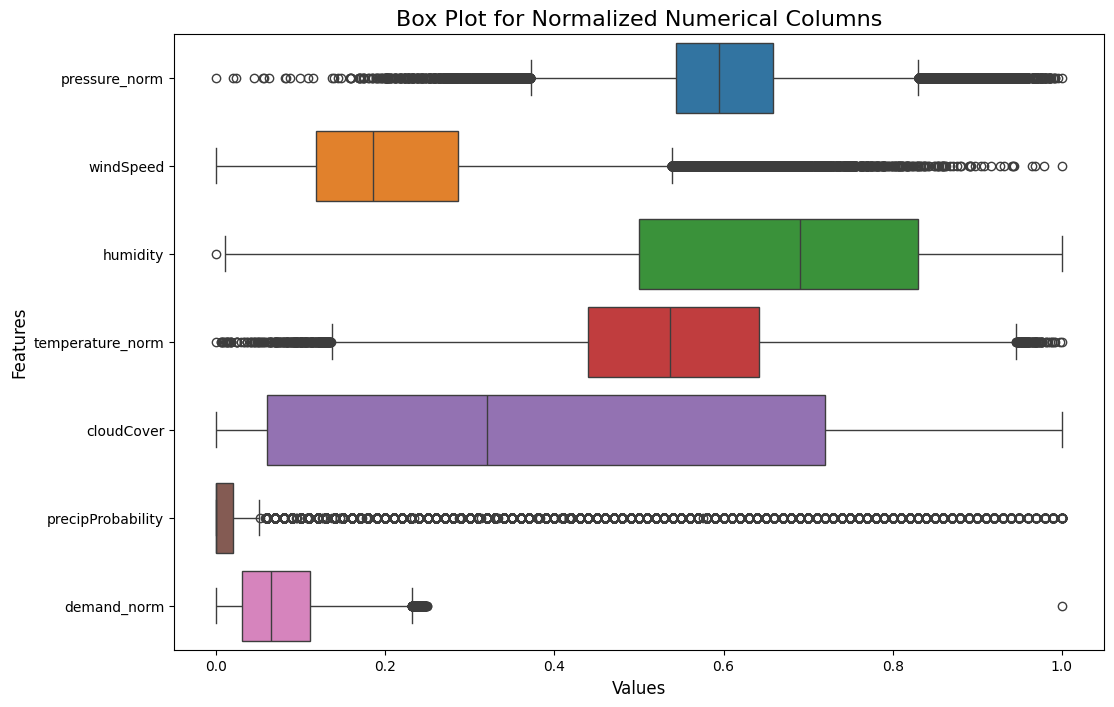

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your normalized numerical columns
norm_numeric_cols = ['pressure_norm', 'windSpeed', 'humidity', 'temperature_norm',
                     'cloudCover', 'precipProbability', 'demand_norm']

# Create a boxplot for each of the normalized columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=normalized_data[norm_numeric_cols], orient="h")

# Add title and labels
plt.title("Box Plot for Normalized Numerical Columns", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.show()


In [62]:
def calculate_outlier_percentage(df, columns):
    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        percentage = (len(outliers) / len(df)) * 100
        outlier_info[col] = round(percentage, 2)

    return outlier_info

# Columns you're analyzing
norm_numeric_cols = ['pressure_norm', 'windSpeed', 'humidity', 'temperature_norm',
                     'cloudCover', 'precipProbability', 'demand_norm']

# Compute and print
outlier_percentages = calculate_outlier_percentage(normalized_data, norm_numeric_cols)
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}% outliers")


pressure_norm: 2.47% outliers
windSpeed: 2.15% outliers
humidity: 0.0% outliers
temperature_norm: 0.21% outliers
cloudCover: 0.0% outliers
precipProbability: 17.01% outliers
demand_norm: 0.06% outliers


In [63]:
def winsorize_series(series, lower_percentile=0.05, upper_percentile=0.94):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    return series.clip(lower, upper)

normalized_data['pressure_norm'] = winsorize_series(normalized_data['pressure_norm'])
normalized_data['windSpeed'] = winsorize_series(normalized_data['windSpeed'])


In [64]:
# Compute and print
outlier_percentages = calculate_outlier_percentage(normalized_data, norm_numeric_cols)
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}% outliers")


pressure_norm: 0.0% outliers
windSpeed: 0.0% outliers
humidity: 0.0% outliers
temperature_norm: 0.21% outliers
cloudCover: 0.0% outliers
precipProbability: 17.01% outliers
demand_norm: 0.06% outliers


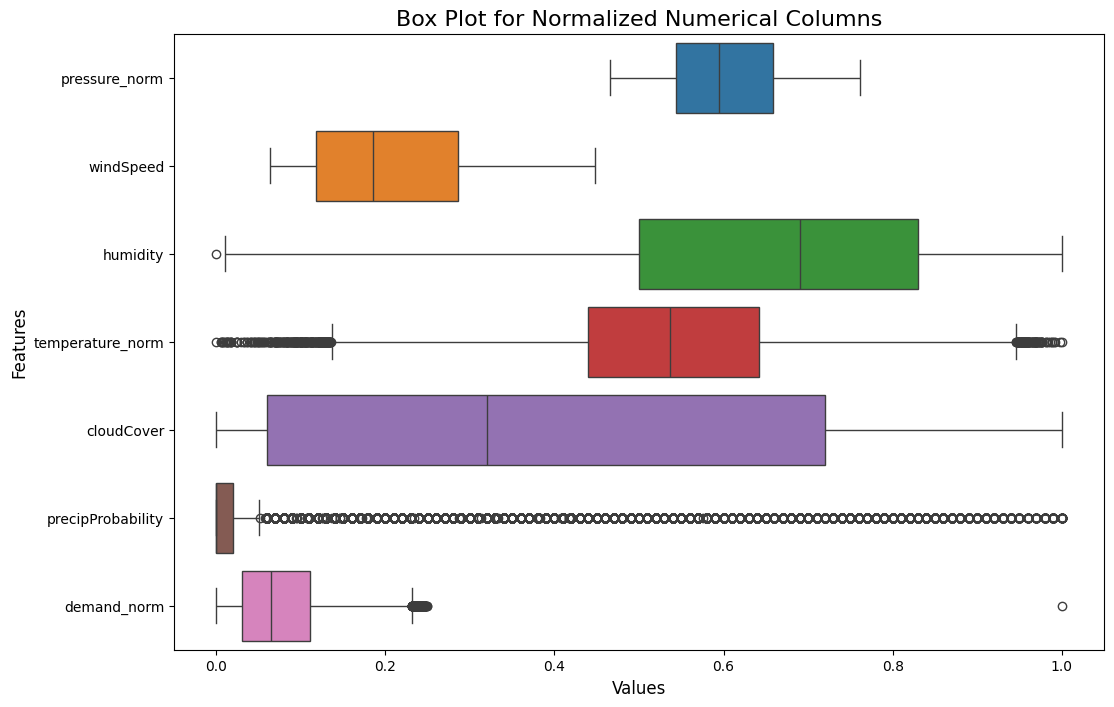

In [65]:
# Define your normalized numerical columns
norm_numeric_cols = ['pressure_norm', 'windSpeed', 'humidity', 'temperature_norm',
                     'cloudCover', 'precipProbability', 'demand_norm']

# Create a boxplot for each of the normalized columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=normalized_data[norm_numeric_cols], orient="h")

# Add title and labels
plt.title("Box Plot for Normalized Numerical Columns", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.show()


In [66]:
#Apply Log(1 + x) Transform
normalized_data['precipProbability_log'] = np.log1p(normalized_data['precipProbability'])

In [ ]:
def winsorize_series(series, lower_percentile=0.19, upper_percentile=0.81):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    return series.clip(lower, upper)=

normalized_data['precipProbability'] = winsorize_series(normalized_data['precipProbability'])

In [72]:
# Compute and print
outlier_percentages = calculate_outlier_percentage(normalized_data, norm_numeric_cols)
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}% outliers")


pressure_norm: 0.0% outliers
windSpeed: 0.0% outliers
humidity: 0.0% outliers
temperature_norm: 0.21% outliers
cloudCover: 0.0% outliers
precipProbability: 0.0% outliers
demand_norm: 0.06% outliers


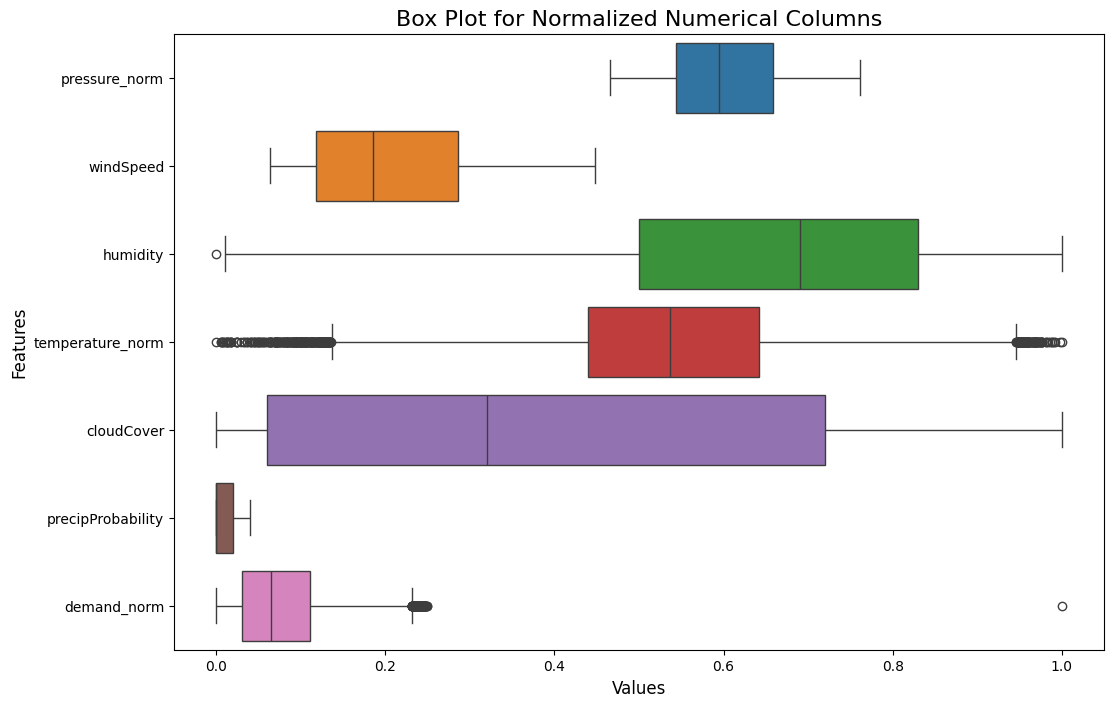

In [73]:
# Define your normalized numerical columns
norm_numeric_cols = ['pressure_norm', 'windSpeed', 'humidity', 'temperature_norm',
                     'cloudCover', 'precipProbability', 'demand_norm']

# Create a boxplot for each of the normalized columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=normalized_data[norm_numeric_cols], orient="h")

# Add title and labels
plt.title("Box Plot for Normalized Numerical Columns", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.show()


In [74]:
columns_to_remove = ['z_anomaly', 'iqr_anomaly', 'iso_anomaly', 'anomaly_flag', 'precipProbability_log']
normalized_data.drop(columns=columns_to_remove, inplace=True)

In [75]:
# Compute and print
outlier_percentages = calculate_outlier_percentage(normalized_data, norm_numeric_cols)
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}% outliers")


pressure_norm: 0.0% outliers
windSpeed: 0.0% outliers
humidity: 0.0% outliers
temperature_norm: 0.21% outliers
cloudCover: 0.0% outliers
precipProbability: 0.0% outliers
demand_norm: 0.06% outliers


In [76]:
normalized_data.head(5)

windSpeed  humidity     city  hour day_of_week month  season  \
0   0.199634      0.78  houston     5      Monday  July  Summer   
1   0.194139      0.79  houston     6      Monday  July  Summer   
2   0.201099      0.82  houston     7      Monday  July  Summer   
3   0.129304      0.83  houston     8      Monday  July  Summer   
4   0.155678      0.84  houston     9      Monday  July  Summer   

                 time summary         icon  cloudCover  precipProbability  \
0 2018-07-02 05:00:00   Humid  clear-night        0.01                0.0   
1 2018-07-02 06:00:00   Humid  clear-night        0.00                0.0   
2 2018-07-02 07:00:00   Humid  clear-night        0.00                0.0   
3 2018-07-02 08:00:00   Humid  clear-night        0.01                0.0   
4 2018-07-02 09:00:00   Humid  clear-night        0.05                0.0   

         date  week  temperature_norm  apparentTemperature_norm  \
0  2018-07-02    27          0.708828                  0.791714   
1  2018-07-02    27          0.703576                  0.784251   
2  2018-07-02    27          0.694975                  0.772371   
3  2018-07-02    27          0.689633                  0.762623   
4  2018-07-02    27          0.684925                  0.754703   

   pressure_norm  demand_norm  
0       0.594181     0.120073  
1       0.591118     0.120073  
2       0.583461     0.120073  
3       0.581930     0.120073  
4       0.584992     0.120073

In [79]:
# Step 1: Filter numeric columns for anomaly detection
norm_numeric_cols = ['pressure_norm', 'windSpeed', 'humidity', 'temperature_norm',
                      'cloudCover', 'precipProbability', 'demand_norm']

normdata = normalized_data[norm_numeric_cols].copy()

# Step 2: Z-score method
z_scores = np.abs(zscore(normdata))
z_thresh = 6
z_anomalies = (z_scores > z_thresh).any(axis=1)


# Step 3: IQR method
Q1 = normdata.quantile(0.25)
Q3 = normdata.quantile(0.75)
IQR = Q3 - Q1
iqr_anomalies = ((normdata < (Q1 - 1.5 * IQR)) | (normdata > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 4: Isolation Forest
iso_forest = IsolationForest(contamination=0.008, random_state=42)
iso_pred = iso_forest.fit_predict(normdata)
iso_anomalies = iso_pred == -1

# Combine all anomaly flags
normalized_data['z_anomaly'] = z_anomalies
normalized_data['iqr_anomaly'] = iqr_anomalies
normalized_data['iso_anomaly'] = iso_anomalies

# Final flag: any anomaly detected
normalized_data['anomaly_flag'] = normalized_data[['z_anomaly', 'iqr_anomaly', 'iso_anomaly']].any(axis=1)

# View anomalies
anomalies = normalized_data[normalized_data['anomaly_flag']]


# Step 6: Display results
# Show counts
print("Anomaly counts:")
print("Z-score anomalies:", z_anomalies.sum())
print("IQR anomalies:", iqr_anomalies.sum())
print("Isolation Forest anomalies:", iso_anomalies.sum())
print("Total flagged anomalies (any method):", normalized_data['anomaly_flag'].sum())

# Show sample of anomalies
print("\nSample anomalies:")
normalized_data[normalized_data['anomaly_flag']].head(10)


Anomaly counts:
Z-score anomalies: 1
IQR anomalies: 445
Isolation Forest anomalies: 1339
Total flagged anomalies (any method): 1695

Sample anomalies:


windSpeed  humidity     city  hour day_of_week     month  season  \
3300   0.447985      0.80  houston     6     Tuesday  November  Autumn   
3301   0.447985      0.80  houston     7     Tuesday  November  Autumn   
3302   0.447985      0.79  houston     8     Tuesday  November  Autumn   
3303   0.447985      0.80  houston     9     Tuesday  November  Autumn   
3304   0.447985      0.78  houston    10     Tuesday  November  Autumn   
3305   0.447985      0.79  houston    11     Tuesday  November  Autumn   
3306   0.447985      0.78  houston    12     Tuesday  November  Autumn   
3307   0.447985      0.77  houston    13     Tuesday  November  Autumn   
3308   0.447985      0.73  houston    14     Tuesday  November  Autumn   
3309   0.447985      0.72  houston    15     Tuesday  November  Autumn   

                    time   summary    icon  ...        date  week  \
3300 2018-11-13 06:00:00  Overcast  cloudy  ...  2018-11-13    46   
3301 2018-11-13 07:00:00  Overcast  cloudy  ...  2018-11-13    46   
3302 2018-11-13 08:00:00  Overcast  cloudy  ...  2018-11-13    46   
3303 2018-11-13 09:00:00  Overcast  cloudy  ...  2018-11-13    46   
3304 2018-11-13 10:00:00  Overcast  cloudy  ...  2018-11-13    46   
3305 2018-11-13 11:00:00  Overcast  cloudy  ...  2018-11-13    46   
3306 2018-11-13 12:00:00  Overcast  cloudy  ...  2018-11-13    46   
3307 2018-11-13 13:00:00  Overcast  cloudy  ...  2018-11-13    46   
3308 2018-11-13 14:00:00  Overcast  cloudy  ...  2018-11-13    46   
3309 2018-11-13 15:00:00  Overcast  cloudy  ...  2018-11-13    46   

     temperature_norm  apparentTemperature_norm  pressure_norm  demand_norm  \
3300         0.364147                  0.399665       0.761103     0.120073   
3301         0.348846                  0.383977       0.761103     0.120073   
3302         0.341240                  0.375447       0.761103     0.120073   
3303         0.336532                  0.373010       0.761103     0.120073   
3304         0.329651                  0.366233       0.761103     0.120073   
3305         0.319149                  0.355571       0.761103     0.120073   
3306         0.316071                  0.355266       0.761103     0.120073   
3307         0.312359                  0.351915       0.761103     0.120073   
3308         0.315165                  0.351687       0.761103     0.120073   
3309         0.317881                  0.354124       0.761103     0.120073   

      z_anomaly  iqr_anomaly  iso_anomaly  anomaly_flag  
3300      False        False         True          True  
3301      False        False         True          True  
3302      False        False         True          True  
3303      False        False         True          True  
3304      False        False         True          True  
3305      False        False         True          True  
3306      False        False         True          True  
3307      False        False         True          True  
3308      False        False         True          True  
3309      False        False         True          True  

[10 rows x 22 columns]

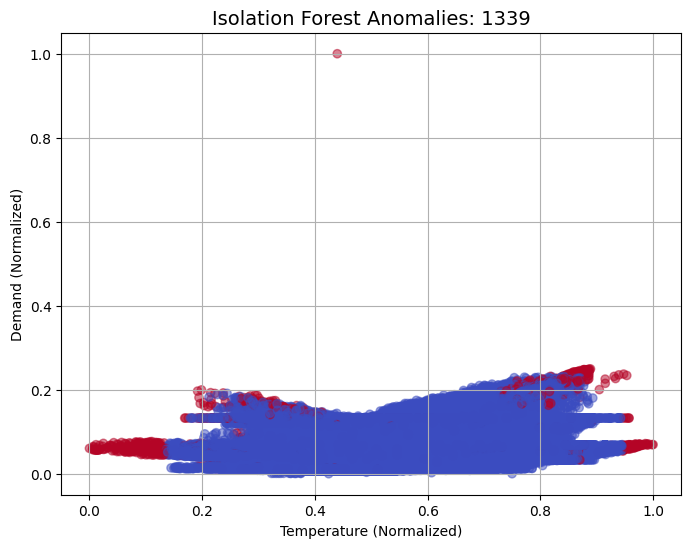

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(
    normalized_data['temperature_norm'], 
    normalized_data['demand_norm'],
    c=normalized_data['anomaly_flag'], cmap='coolwarm', alpha=0.5
)

plt.title(f"Isolation Forest Anomalies: {iso_anomalies.sum()}", fontsize=14)
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Demand (Normalized)")
plt.grid(True)
plt.show()


Not a big issue for the temperature because we need the temperature here

In [81]:
columns_to_remove = ['z_anomaly', 'iqr_anomaly', 'iso_anomaly', 'anomaly_flag']
normalized_data.drop(columns=columns_to_remove, inplace=True)

# Rename columns to remove '_norm'
normalized_data.rename(columns={
    'temperature_norm': 'temperature',
    'apparentTemperature_norm': 'apparentTemperature',
    'pressure_norm': 'pressure',
    'demand_norm': 'demand'
}, inplace=True)

normalized_data.head(5)

windSpeed  humidity     city  hour day_of_week month  season  \
0   0.199634      0.78  houston     5      Monday  July  Summer   
1   0.194139      0.79  houston     6      Monday  July  Summer   
2   0.201099      0.82  houston     7      Monday  July  Summer   
3   0.129304      0.83  houston     8      Monday  July  Summer   
4   0.155678      0.84  houston     9      Monday  July  Summer   

                 time summary         icon  cloudCover  precipProbability  \
0 2018-07-02 05:00:00   Humid  clear-night        0.01                0.0   
1 2018-07-02 06:00:00   Humid  clear-night        0.00                0.0   
2 2018-07-02 07:00:00   Humid  clear-night        0.00                0.0   
3 2018-07-02 08:00:00   Humid  clear-night        0.01                0.0   
4 2018-07-02 09:00:00   Humid  clear-night        0.05                0.0   

         date  week  temperature  apparentTemperature  pressure    demand  
0  2018-07-02    27     0.708828             0.791714  0.594181  0.120073  
1  2018-07-02    27     0.703576             0.784251  0.591118  0.120073  
2  2018-07-02    27     0.694975             0.772371  0.583461  0.120073  
3  2018-07-02    27     0.689633             0.762623  0.581930  0.120073  
4  2018-07-02    27     0.684925             0.754703  0.584992  0.120073

In [ ]:
normalized_data.to_csv('normalized_data.csv', index=False)
print("Data saved to 'normalized_data.csv'")

Data saved to 'normalized_data.csv'


In [3]:
# Load the normalized data
predata = pd.read_csv('preprocessed_data.csv')

Text(0.5, 1.0, 'Box Plot of Demand by City')

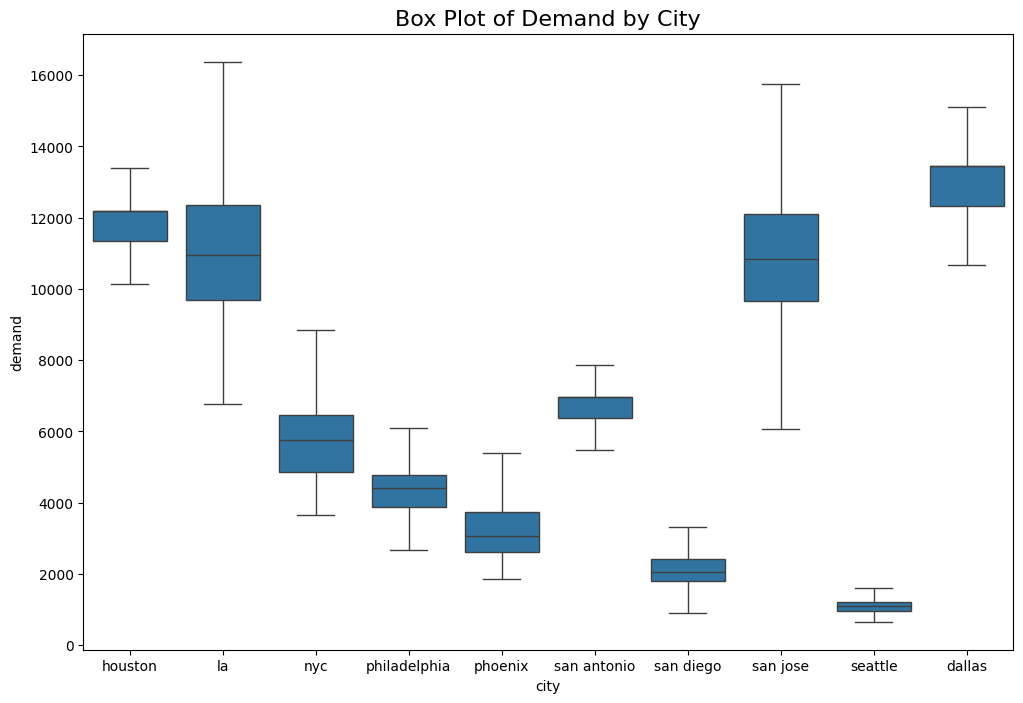

In [6]:
# want to display box whisker for demand column for each city separately
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='demand', data=predata, showfliers=False)
plt.title("Box Plot of Demand by City", fontsize=16)

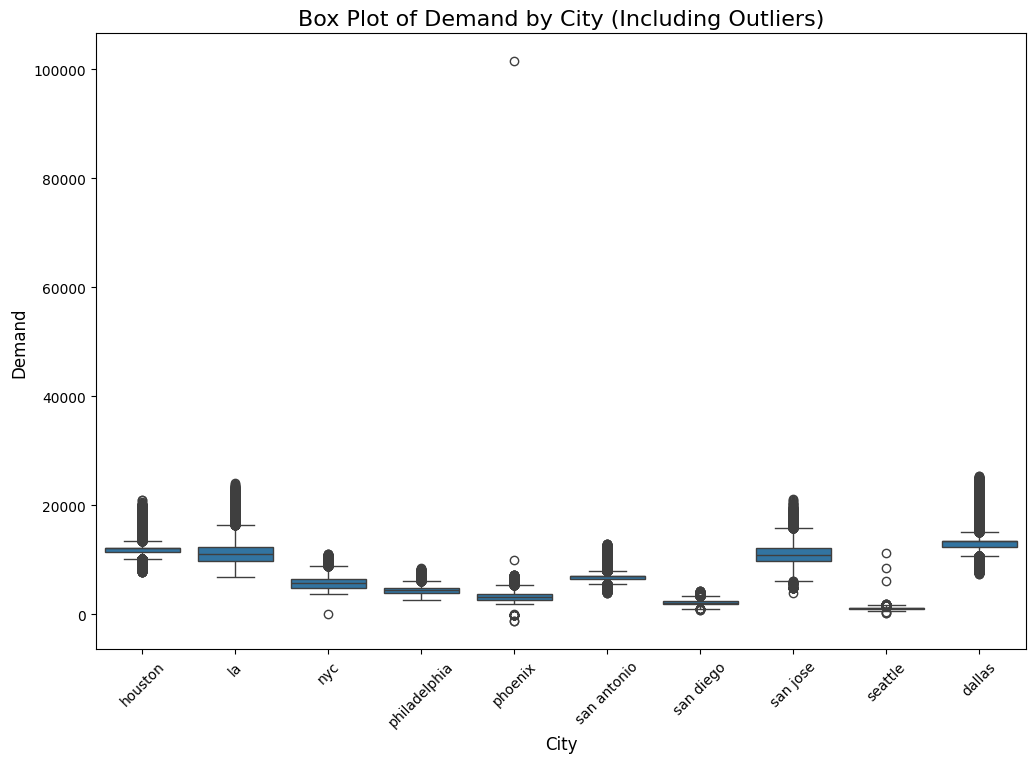

In [7]:
# Display box whisker plot for demand column for each city, including outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='demand', data=predata)
plt.title("Box Plot of Demand by City (Including Outliers)", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [8]:
def calculate_outlier_ratio(df, column):
    outlier_ratios = {}

    for city in df['city'].unique():
        city_data = df[df['city'] == city]
        Q1 = city_data[column].quantile(0.25)
        Q3 = city_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = city_data[(city_data[column] < lower_bound) | (city_data[column] > upper_bound)]
        outlier_ratios[city] = len(outliers) / len(city_data)

    return outlier_ratios

# Calculate outlier ratios for the 'demand' column
outlier_ratios = calculate_outlier_ratio(predata, 'demand')

# Display the results
for city, ratio in outlier_ratios.items():
    print(f"{city}: {ratio:.2%} outliers")

houston: 26.34% outliers
la: 7.28% outliers
nyc: 3.67% outliers
philadelphia: 4.27% outliers
phoenix: 6.94% outliers
san antonio: 24.38% outliers
san diego: 2.30% outliers
san jose: 4.36% outliers
seattle: 0.91% outliers
dallas: 23.93% outliers


houston: 26.34% outliers
la: 0.00% outliers
nyc: 3.67% outliers
philadelphia: 4.27% outliers
phoenix: 6.84% outliers
san antonio: 24.38% outliers
san diego: 2.22% outliers
san jose: 0.21% outliers
seattle: 5.91% outliers
dallas: 10.43% outliers


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'houston'),
  Text(1, 0, 'la'),
  Text(2, 0, 'nyc'),
  Text(3, 0, 'philadelphia'),
  Text(4, 0, 'phoenix'),
  Text(5, 0, 'san antonio'),
  Text(6, 0, 'san diego'),
  Text(7, 0, 'san jose'),
  Text(8, 0, 'seattle'),
  Text(9, 0, 'dallas')])

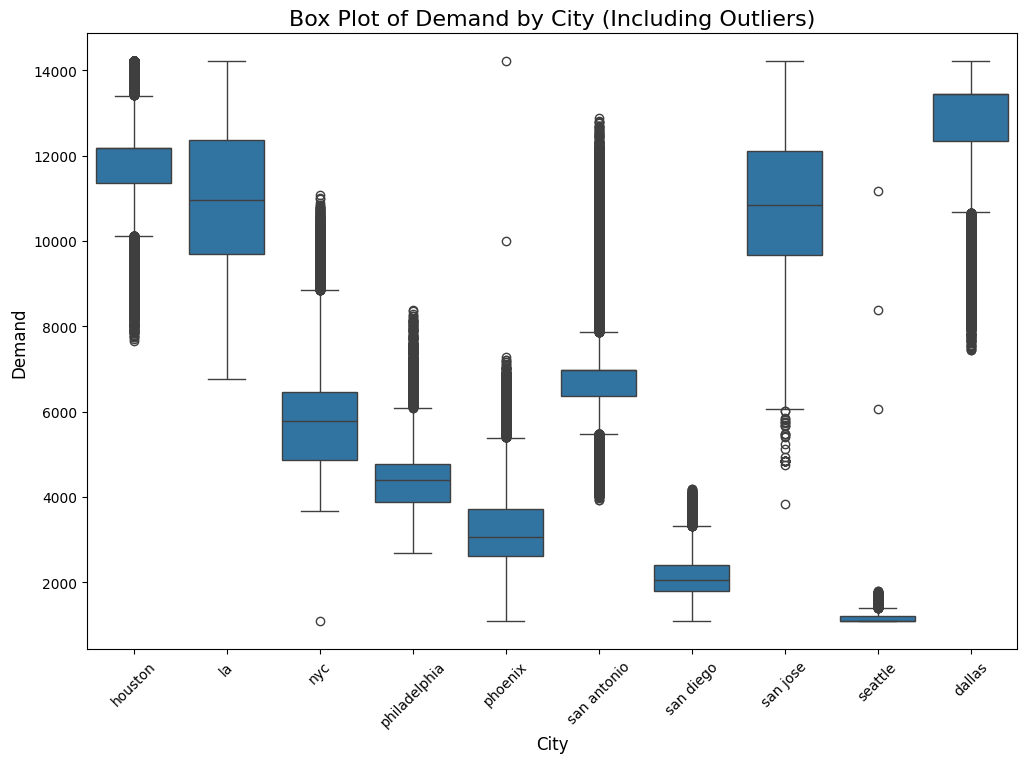

In [11]:
def winsorize_series(series, lower_percentile=0.05, upper_percentile=0.95):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    return series.clip(lower, upper)
# Apply winsorization to the demand column  
predata['demand'] = winsorize_series(predata['demand'])
# Calculate outlier ratios for the 'demand' column
outlier_ratios = calculate_outlier_ratio(predata, 'demand')
# Display the results
for city, ratio in outlier_ratios.items():
    print(f"{city}: {ratio:.2%} outliers")
# Display box whisker plot for demand column for each city, including outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='demand', data=predata)
plt.title("Box Plot of Demand by City (Including Outliers)", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'houston'),
  Text(1, 0, 'la'),
  Text(2, 0, 'nyc'),
  Text(3, 0, 'philadelphia'),
  Text(4, 0, 'phoenix'),
  Text(5, 0, 'san antonio'),
  Text(6, 0, 'san diego'),
  Text(7, 0, 'san jose'),
  Text(8, 0, 'seattle'),
  Text(9, 0, 'dallas')])

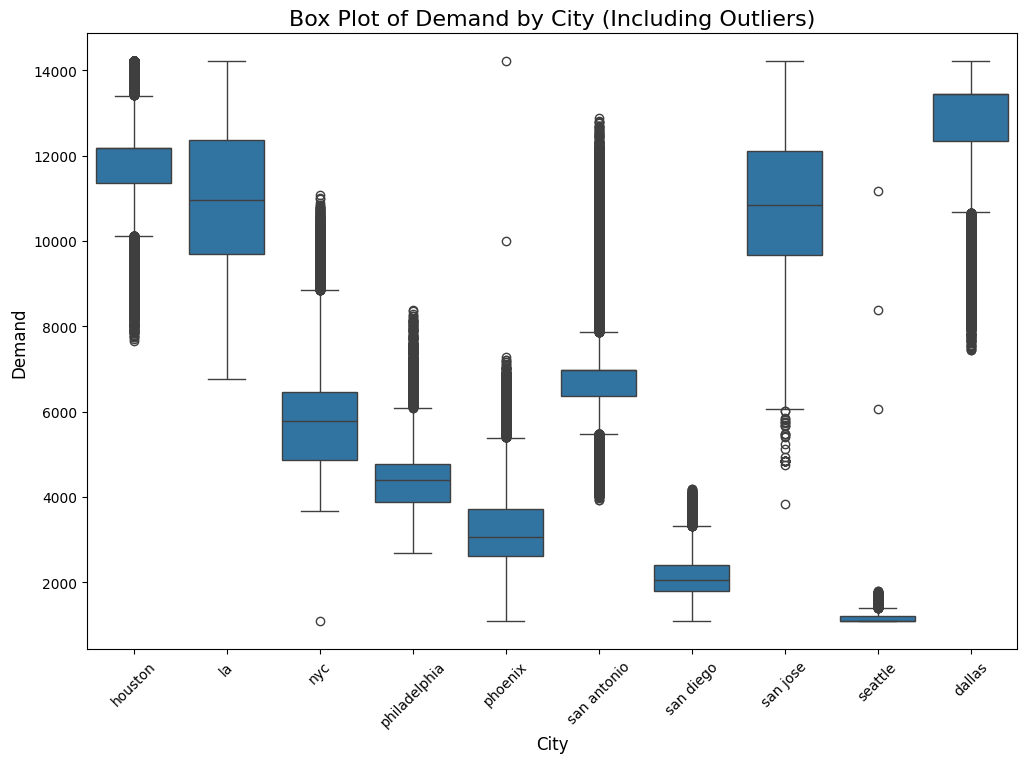

In [13]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='demand', data=predata)
plt.title("Box Plot of Demand by City (Including Outliers)", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.xticks(rotation=45)

In [14]:
# min and max values for demand column of each city
for city in predata['city'].unique():
    min_val = predata[predata['city'] == city]['demand'].min()
    max_val = predata[predata['city'] == city]['demand'].max()
    print(f"{city}: min = {min_val}, max = {max_val}")

houston: min = 7651.0, max = 14204.0
la: min = 6764.0, max = 14204.0
nyc: min = 1085.0, max = 11069.0
philadelphia: min = 2677.0, max = 8382.0
phoenix: min = 1085.0, max = 14204.0
san antonio: min = 3924.0, max = 12871.0
san diego: min = 1085.0, max = 4179.0
san jose: min = 3834.0, max = 14204.0
seattle: min = 1085.0, max = 11174.0
dallas: min = 7439.0, max = 14204.0


In [15]:
# now save the preprocessed data into a csv file
predata.to_csv('preprocessed_data2.csv', index=False)
print("Data saved to 'preprocessed_data2.csv'")

Data saved to 'preprocessed_data2.csv'


CLUSTERING

CLUSTER ANALYSIS TOOL
Sampling 10000 data points from 167264 total points.
Data loaded successfully with 10000 samples and 9 features.
Features: pressure, windSpeed, humidity, temperature, apparentTemperature, hour, cloudCover, precipProbability, demand

DIMENSIONALITY REDUCTION

PCA Results:
Number of components needed to explain 90% variance: 7
First component explains 30.34% of variance
Second component explains 20.23% of variance


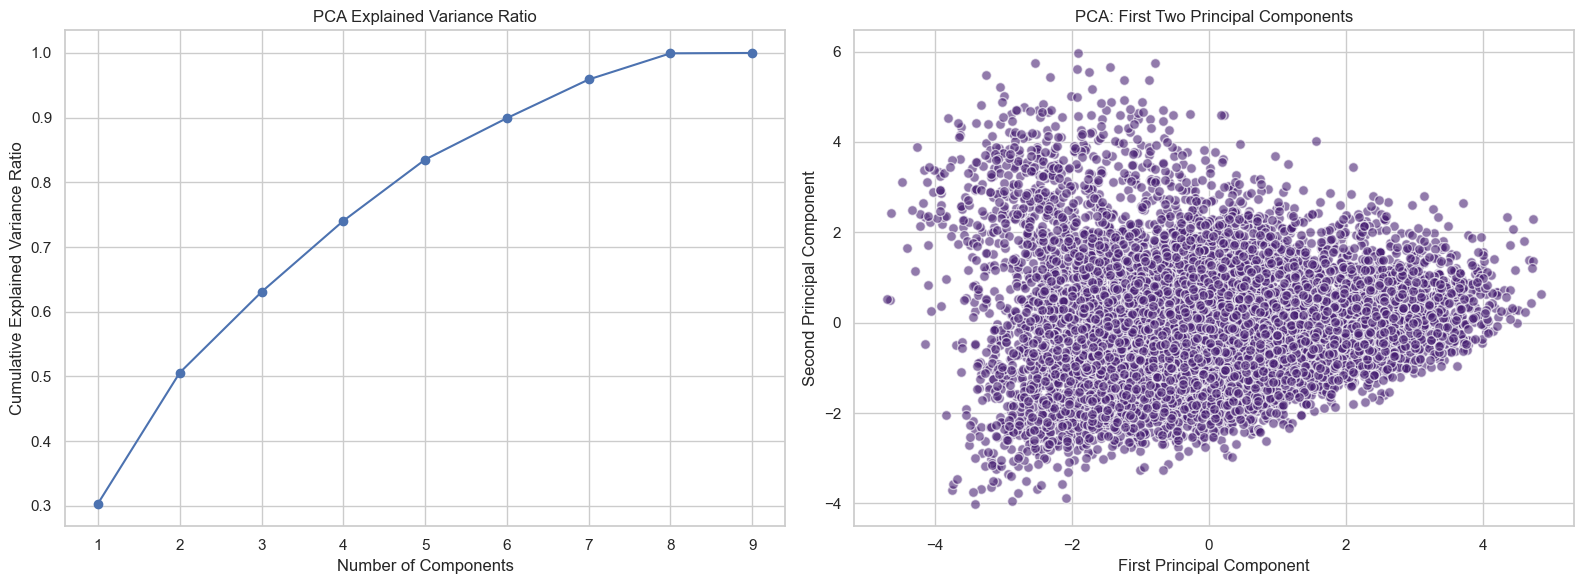


K-MEANS CLUSTERING

Finding optimal number of clusters...
                              
K-means Analysis Results:
Optimal number of clusters (k): 2
Best silhouette score: 0.1821


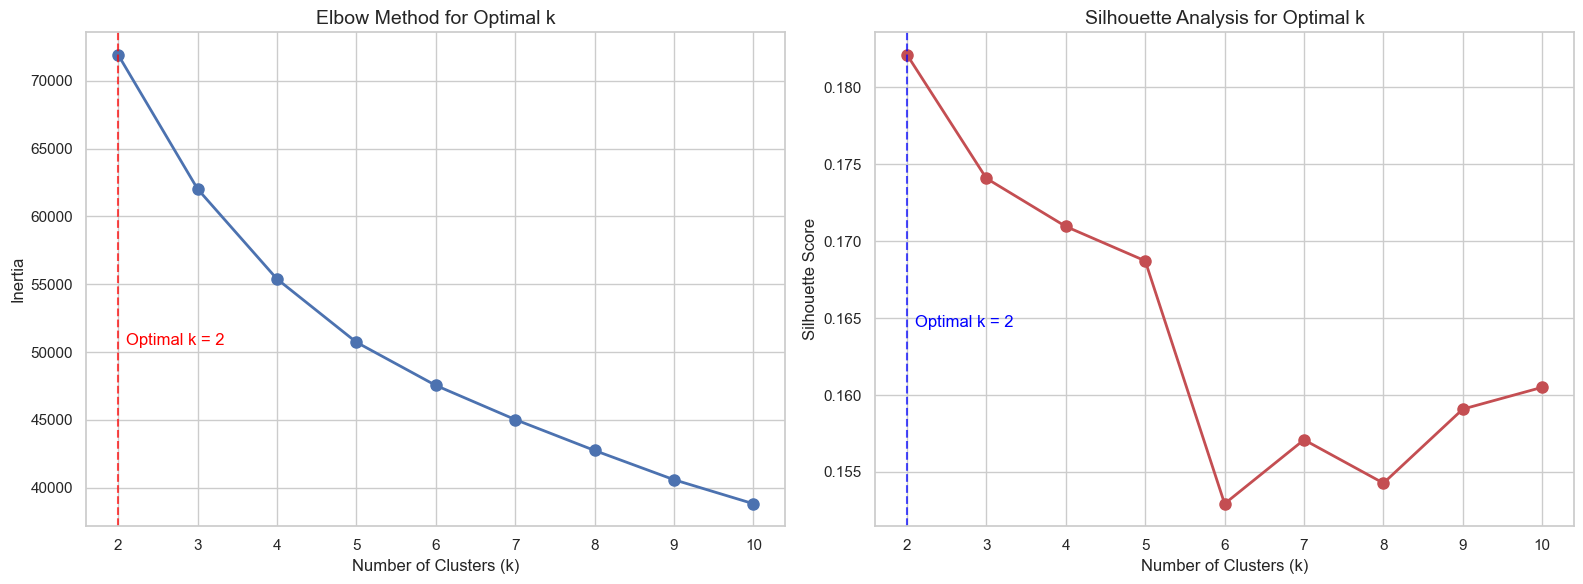


Performing K-means clustering with k=2...
K-means clustering completed in 0.03 seconds
Cluster distribution:
  Cluster 0: 5708 points (57.1%)
  Cluster 1: 4292 points (42.9%)


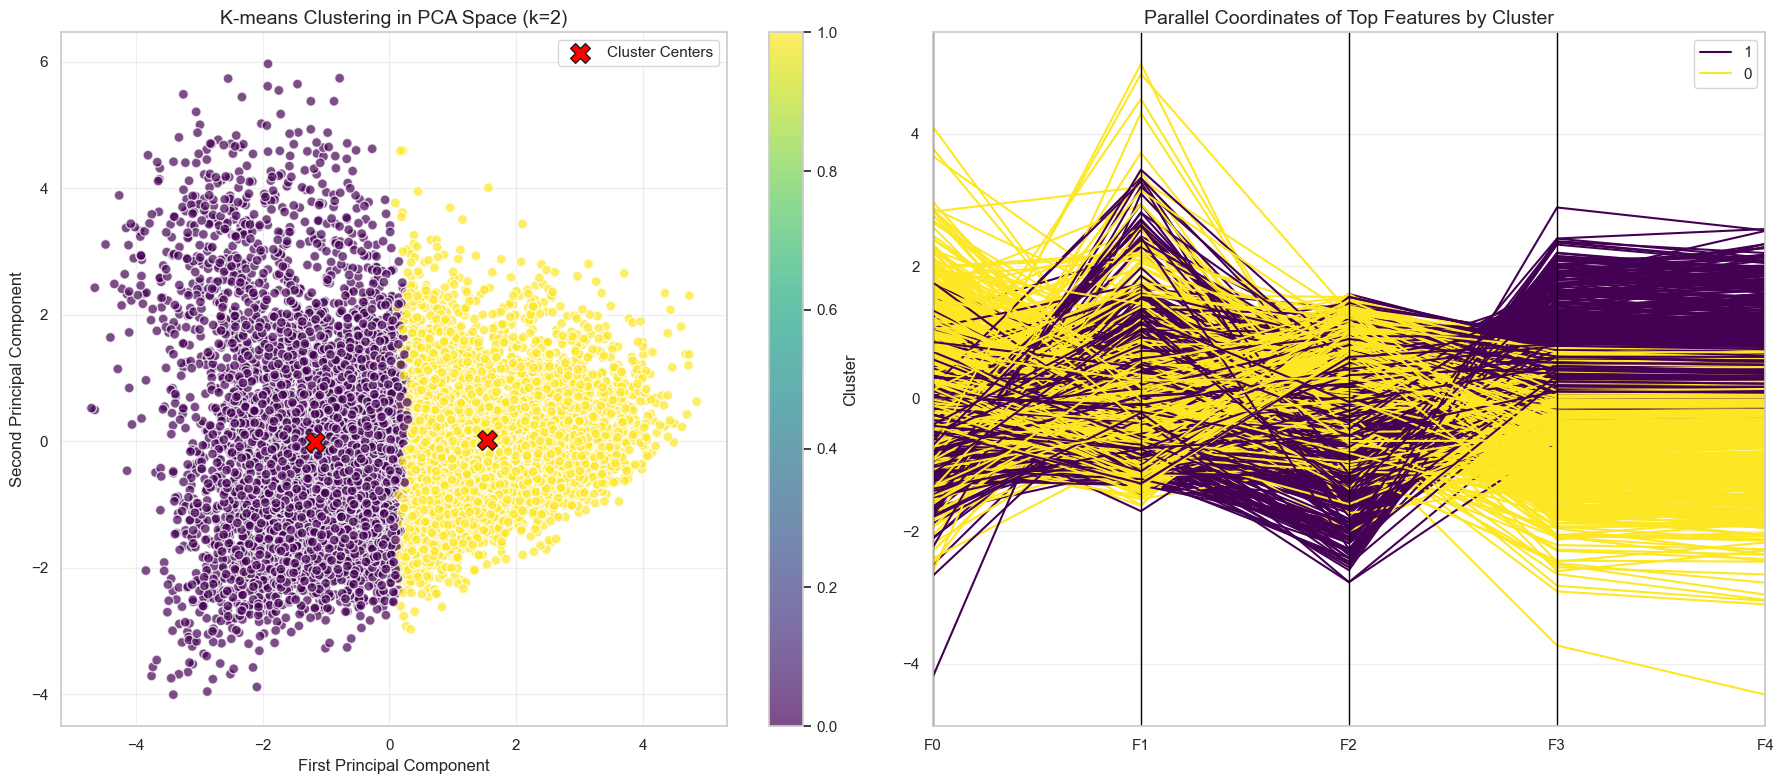


K-means Cluster Statistics Summary:
--------------------------------------------------
            pressure  windSpeed  humidity  temperature  apparentTemperature       hour  \
cluster                                                                                  
0        1017.886309   5.615580  0.749115    53.554057            52.477581  10.737561   
1        1013.894657   6.252024  0.519867    76.707598            78.222185  12.367894   

         cloudCover  precipProbability      demand  
cluster                                             
0          0.532718           0.094122  5950.93054  
1          0.216458           0.011883  8880.13873  


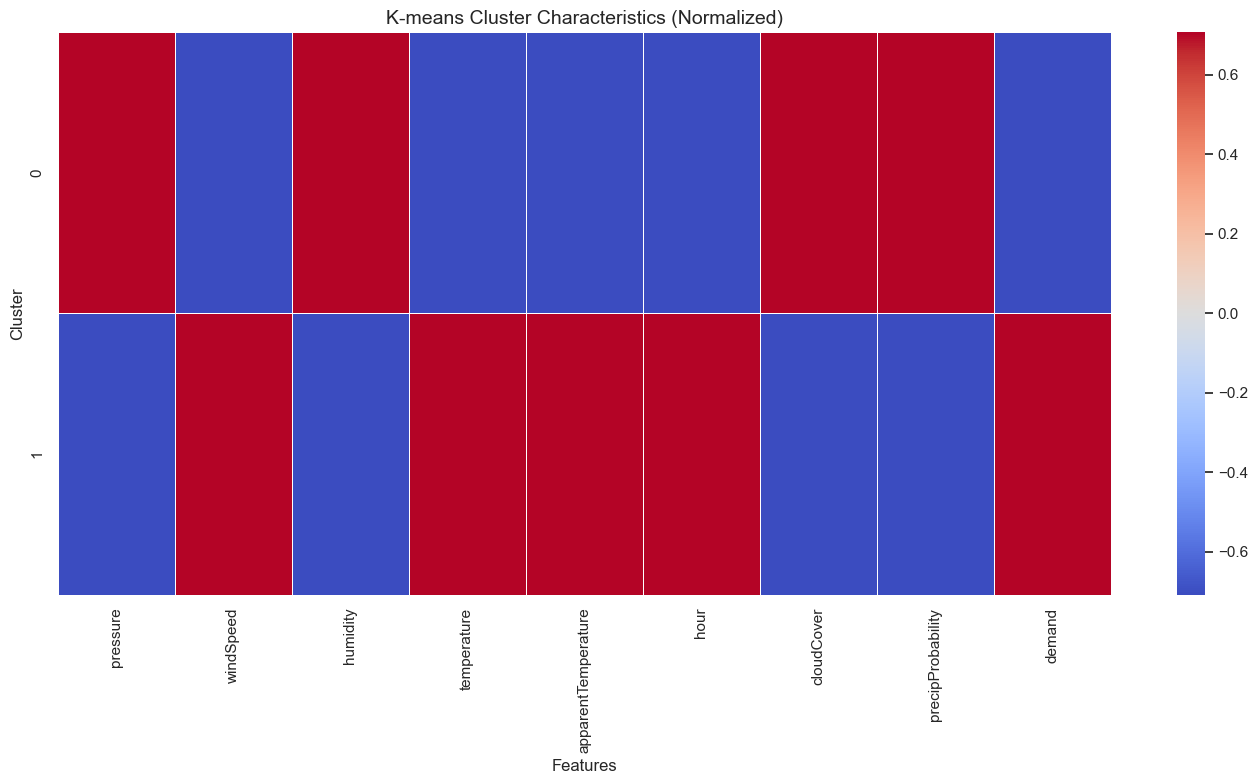


K-means Cluster Interpretation Report

Cluster 0:
------------------------------
  demand: 5950.93 (↓ 17.4% lower than average)
  apparentTemperature: 52.48 (↓ 17.4% lower than average)
  temperature: 53.55 (↓ 15.7% lower than average)
  Peak hours: 8, 10, 14
  Temperature: 53.6°F (-9.9°F from average)
  Humidity: 74.9% (+9.8% from average)

Cluster 1:
------------------------------
  demand: 8880.14 (↑ 23.2% higher than average)
  apparentTemperature: 78.22 (↑ 23.1% higher than average)
  temperature: 76.71 (↑ 20.8% higher than average)
  Peak hours: 0, 21, 20
  Temperature: 76.7°F (+13.2°F from average)
  Humidity: 52.0% (-13.1% from average)


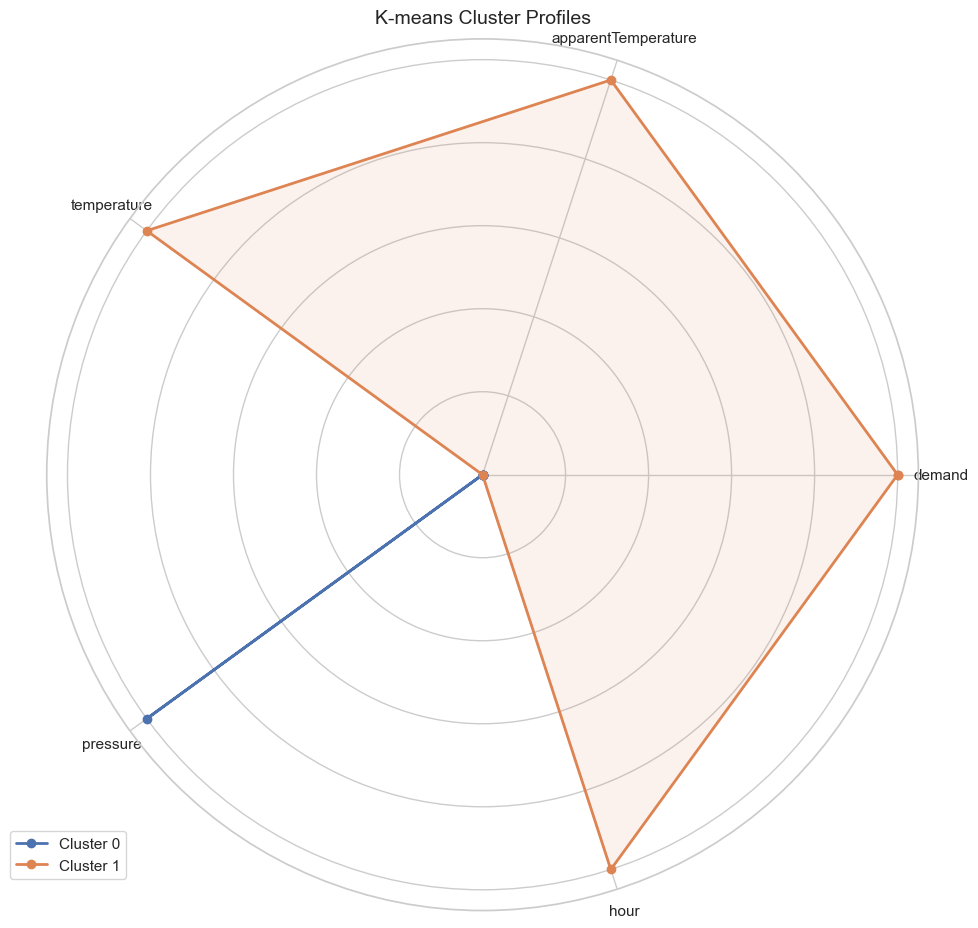


DBSCAN CLUSTERING

Performing DBSCAN clustering...
DBSCAN clustering completed in 0.34 seconds
Parameters: eps=0.5, min_samples=5
Number of clusters: 75
Number of noise points: 9213 (92.1%)
Cluster distribution:
  Noise: 9213 points (92.1%)
  Cluster 0: 86 points (0.9%)
  Cluster 1: 7 points (0.1%)
  Cluster 2: 29 points (0.3%)
  Cluster 3: 18 points (0.2%)
  Cluster 4: 44 points (0.4%)
  Cluster 5: 12 points (0.1%)
  Cluster 6: 34 points (0.3%)
  Cluster 7: 31 points (0.3%)
  Cluster 8: 9 points (0.1%)
  Cluster 9: 31 points (0.3%)
  Cluster 10: 28 points (0.3%)
  Cluster 11: 7 points (0.1%)
  Cluster 12: 8 points (0.1%)
  Cluster 13: 7 points (0.1%)
  Cluster 14: 10 points (0.1%)
  Cluster 15: 11 points (0.1%)
  Cluster 16: 23 points (0.2%)
  Cluster 17: 7 points (0.1%)
  Cluster 18: 23 points (0.2%)
  Cluster 19: 6 points (0.1%)
  Cluster 20: 8 points (0.1%)
  Cluster 21: 7 points (0.1%)
  Cluster 22: 9 points (0.1%)
  Cluster 23: 5 points (0.1%)
  Cluster 24: 9 points (0.1%)
  Clu

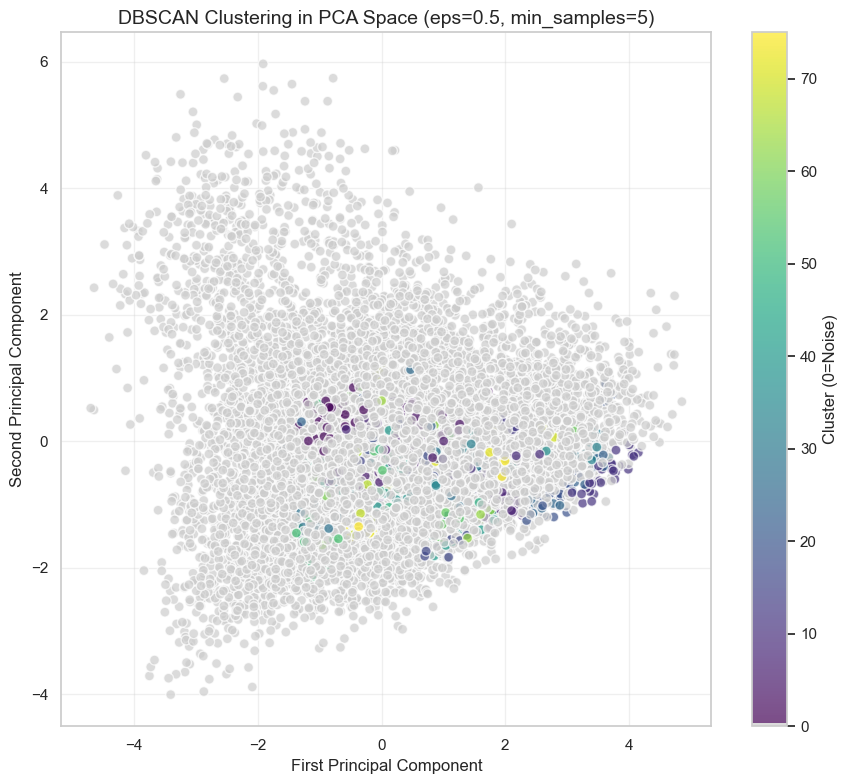


DBSCAN Cluster Statistics Summary:
--------------------------------------------------
            pressure  windSpeed  humidity  temperature  apparentTemperature       hour  \
cluster                                                                                  
-1       1016.372357   6.075087  0.652754    63.011444            63.028776  11.493433   
 0       1014.330233   3.016163  0.829302    64.028605            64.204884  10.558140   
 1       1014.585714   4.075714  0.858571    80.502857            86.645714  11.428571   
 2       1013.579310   7.365517  0.660345    73.329310            73.595517  20.827586   
 3       1013.800000   7.925000  0.612778    73.184444            73.225000  20.500000   
...              ...        ...       ...          ...                  ...        ...   
 70      1015.200000   1.925000  0.767500    67.877500            67.992500  14.500000   
 71      1010.780000   4.080000  0.580000    73.852000            73.884000  18.200000   
 72      1016

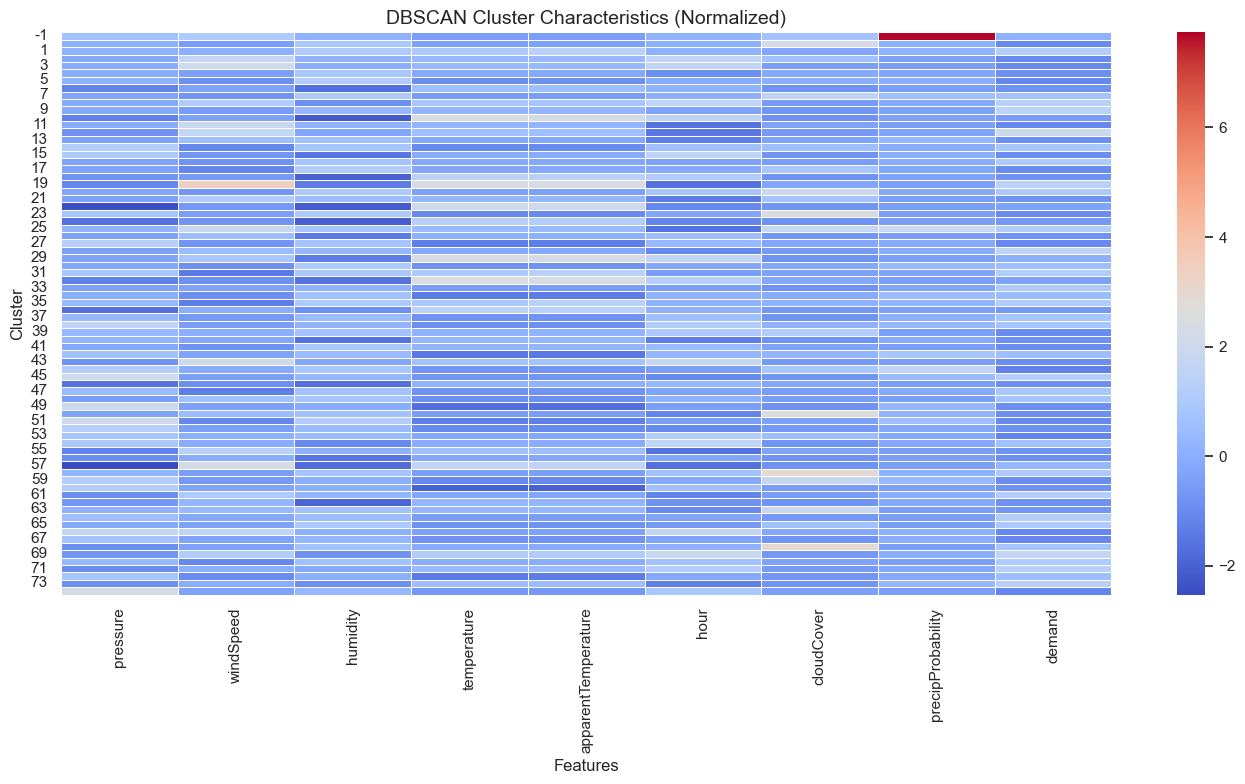


DBSCAN Cluster Interpretation Report

Cluster -1:
------------------------------
  demand: 7324.96 (↑ 1.6% higher than average)
  apparentTemperature: 63.03 (↓ 0.8% lower than average)
  temperature: 63.01 (↓ 0.8% lower than average)
  Peak hours: 0, 21, 18
  Temperature: 63.0°F (-0.5°F from average)
  Humidity: 65.3% (+0.2% from average)

Cluster 0:
------------------------------
  demand: 2036.06 (↓ 71.8% lower than average)
  windSpeed: 3.02 (↓ 48.8% lower than average)
  pressure: 1014.33 (↓ 0.2% lower than average)
  Peak hours: 6, 14, 8
  Temperature: 64.0°F (+0.5°F from average)
  Humidity: 82.9% (+17.9% from average)

Cluster 1:
------------------------------
  demand: 12365.19 (↑ 71.5% higher than average)
  apparentTemperature: 86.65 (↑ 36.4% higher than average)
  temperature: 80.50 (↑ 26.8% higher than average)
  Peak hours: 10, 12, 11
  Temperature: 80.5°F (+17.0°F from average)
  Humidity: 85.9% (+20.8% from average)

Cluster 2:
------------------------------
  demand: 2

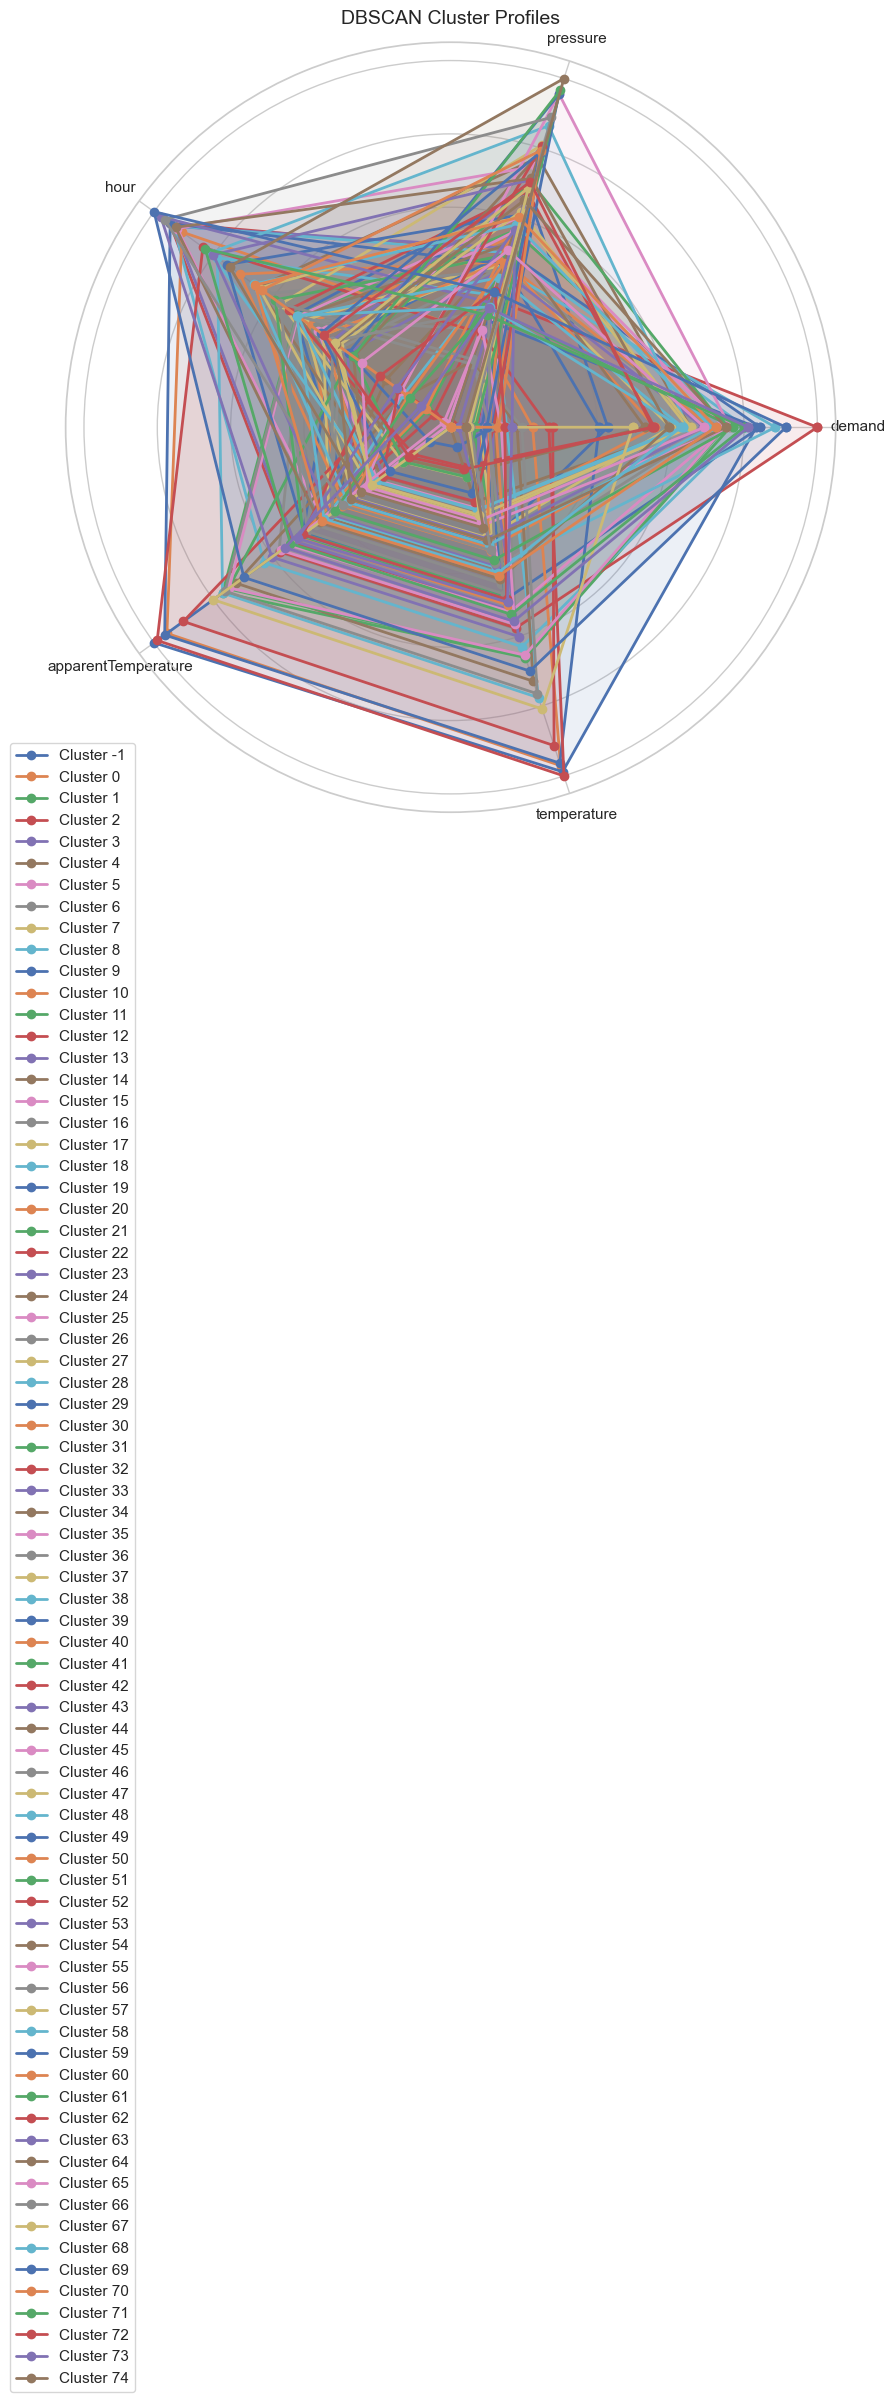


HIERARCHICAL CLUSTERING

Performing hierarchical clustering...
Sampling 100 points for dendrogram visualization...


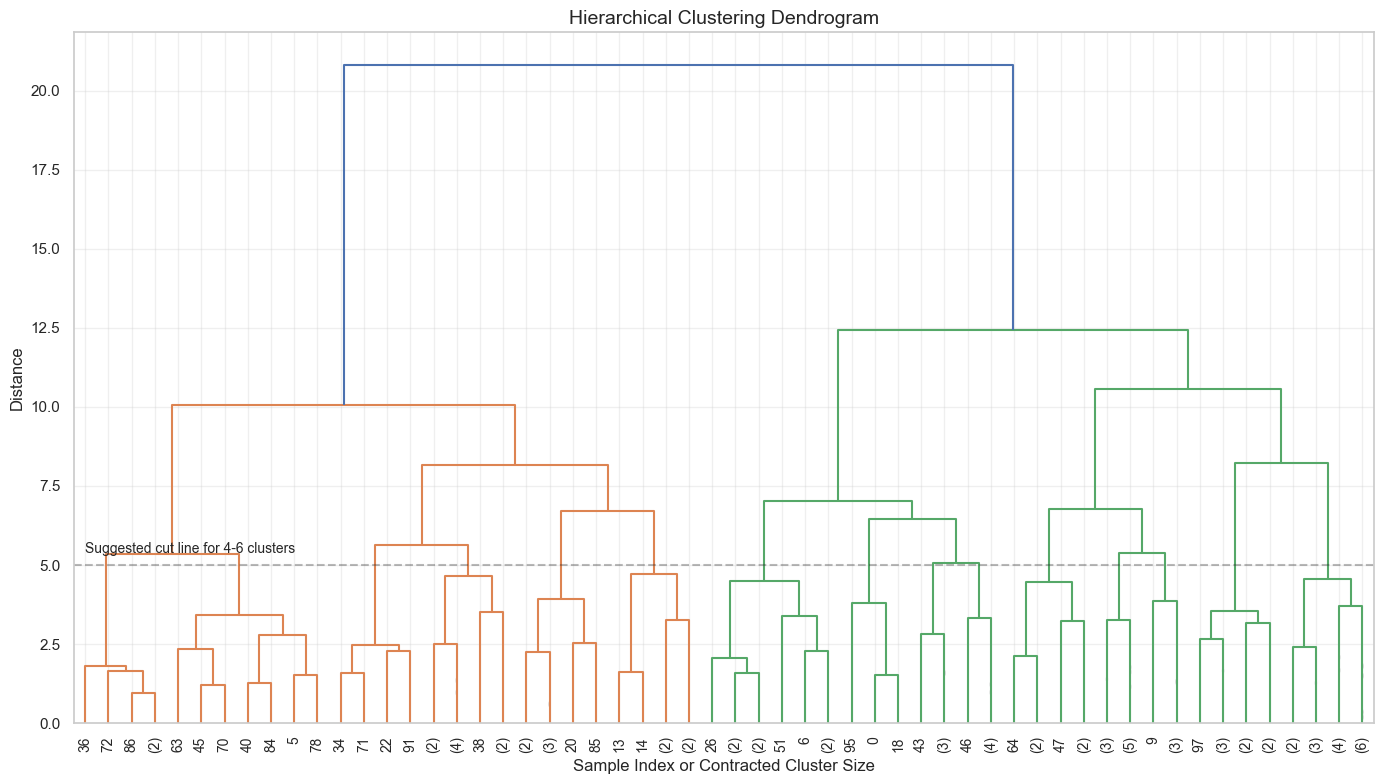

Suggested number of clusters from dendrogram: ~4
Hierarchical clustering completed in 3.09 seconds
Cluster distribution:
  Cluster 0: 2977 points (29.8%)
  Cluster 1: 3641 points (36.4%)
  Cluster 2: 681 points (6.8%)
  Cluster 3: 2701 points (27.0%)


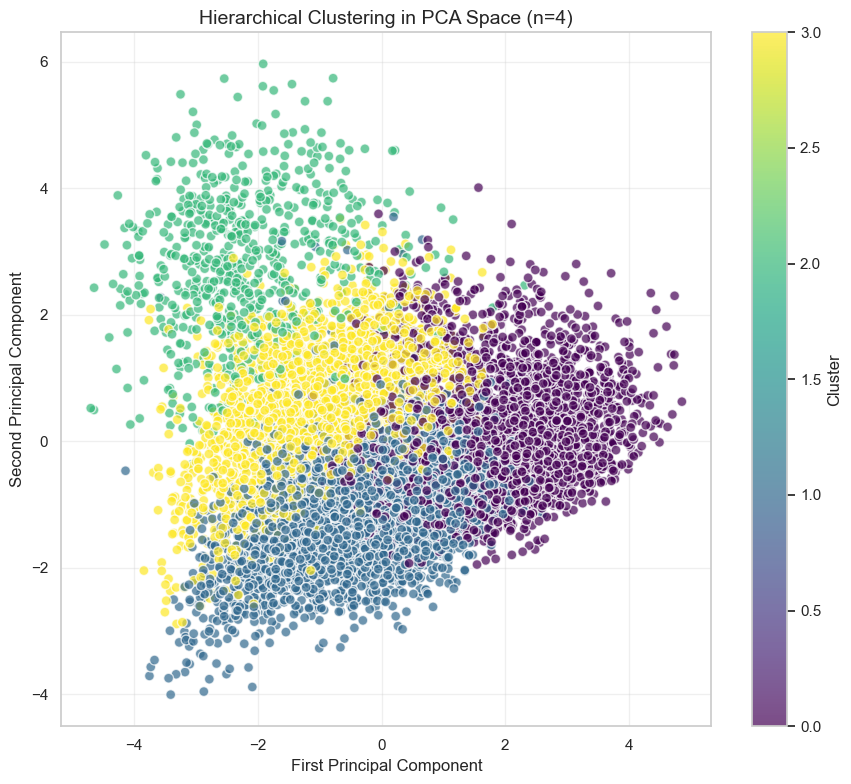


Hierarchical Cluster Statistics Summary:
--------------------------------------------------
            pressure  windSpeed  humidity  temperature  apparentTemperature       hour  \
cluster                                                                                  
0        1013.129930   6.484171  0.510957    77.970561            79.748989  11.525025   
1        1019.111733   4.948732  0.605921    56.760876            55.929368  11.627026   
2        1013.041116   8.070162  0.887269    54.607959            53.423157  11.541850   
3        1016.355535   5.949622  0.805520    58.845924            58.437212  11.058497   

         cloudCover  precipProbability       demand  
cluster                                              
0          0.217130           0.010534  9987.130759  
1          0.199463           0.008316  5880.396469  
2          0.892907           0.558737  6189.614442  
3          0.736424           0.054095  6191.828102  


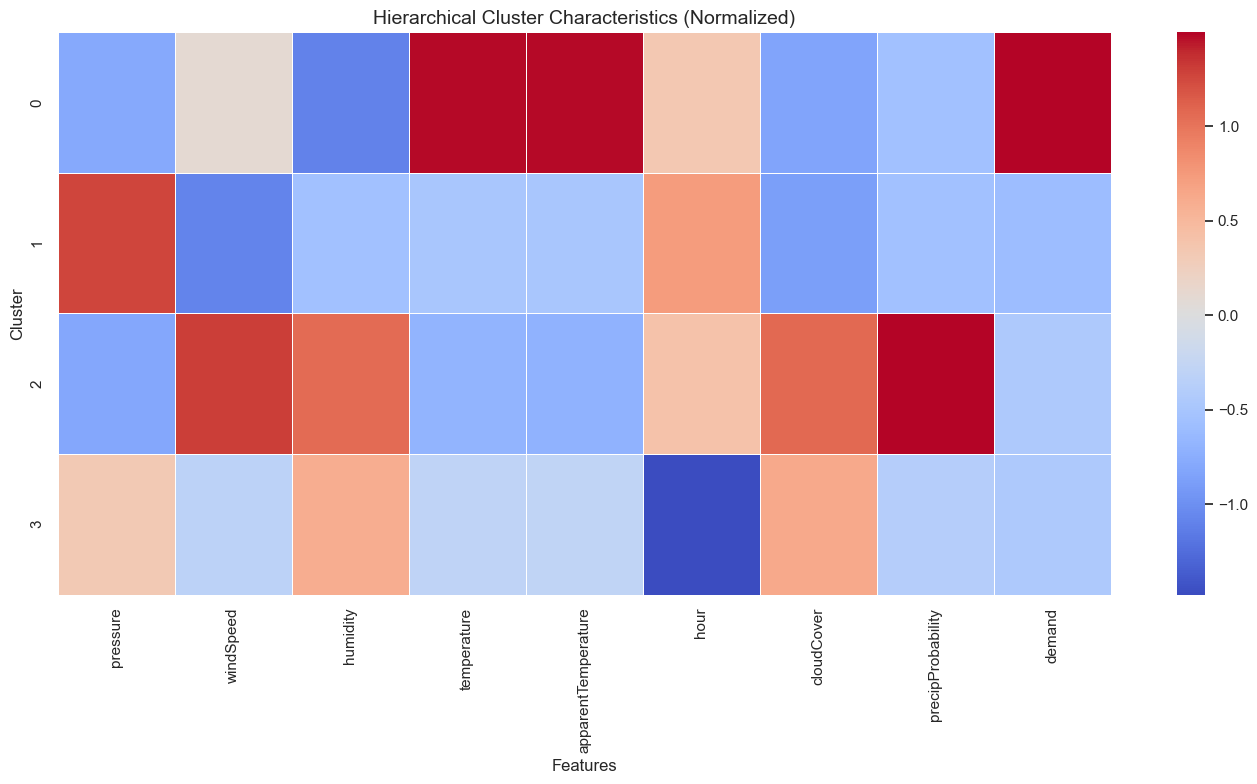


Hierarchical Cluster Interpretation Report

Cluster 0:
------------------------------
  demand: 9987.13 (↑ 38.6% higher than average)
  apparentTemperature: 79.75 (↑ 25.5% higher than average)
  temperature: 77.97 (↑ 22.8% higher than average)
  Peak hours: 0, 21, 20
  Temperature: 78.0°F (+14.5°F from average)
  Humidity: 51.1% (-14.0% from average)

Cluster 1:
------------------------------
  demand: 5880.40 (↓ 18.4% lower than average)
  apparentTemperature: 55.93 (↓ 12.0% lower than average)
  temperature: 56.76 (↓ 10.6% lower than average)
  Peak hours: 8, 7, 14
  Temperature: 56.8°F (-6.7°F from average)
  Humidity: 60.6% (-4.5% from average)

Cluster 2:
------------------------------
  demand: 6189.61 (↓ 14.1% lower than average)
  apparentTemperature: 53.42 (↓ 15.9% lower than average)
  temperature: 54.61 (↓ 14.0% lower than average)
  Peak hours: 10, 21, 6
  Temperature: 54.6°F (-8.9°F from average)
  Humidity: 88.7% (+23.7% from average)

Cluster 3:
------------------------

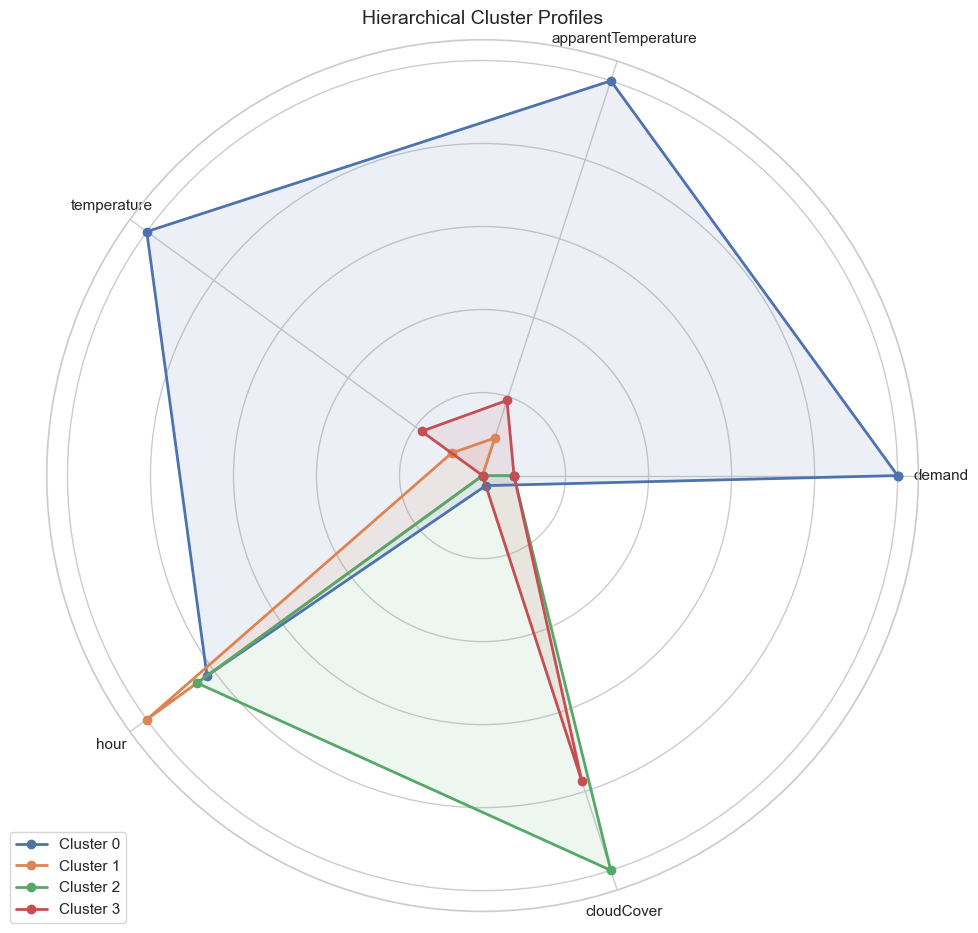


CLUSTER ANALYSIS COMPLETE
All clustering methods have been performed and visualized.
Review the visualizations and terminal output for interpretation of results.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_theme(style="whitegrid")
# Set a consistent color palette for better visuals
palette = sns.color_palette("viridis", 10)

def load_and_prepare_data(sample_size=10000):
    """Load and prepare the data for clustering"""
    # Load the preprocessed data
    df = pd.read_csv('preprocessed_data2.csv')

    # Sample the data if it's too large
    if len(df) > sample_size:
        print(f"Sampling {sample_size} data points from {len(df)} total points.")
        df = df.sample(n=sample_size, random_state=42)

    # Select numerical columns for clustering
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    X = df[numerical_cols]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df, numerical_cols

def perform_pca(X_scaled):
    """Perform PCA and visualize the results"""
    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot explained variance ratio
    ax1.plot(range(1, len(pca.explained_variance_ratio_) + 1),
              np.cumsum(pca.explained_variance_ratio_), 'bo-')
    ax1.set_xlabel('Number of Components')
    ax1.set_ylabel('Cumulative Explained Variance Ratio')
    ax1.set_title('PCA Explained Variance Ratio')
    ax1.grid(True)
    
    # Calculate variance explained by first few components for reporting
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    components_90pct = np.where(var_explained >= 0.9)[0][0] + 1
    print(f"\nPCA Results:")
    print(f"Number of components needed to explain 90% variance: {components_90pct}")
    print(f"First component explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
    print(f"Second component explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance")

    # Plot first two principal components with a better visual style
    scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c=palette[0], edgecolor='w', s=50)
    ax2.set_xlabel('First Principal Component')
    ax2.set_ylabel('Second Principal Component')
    ax2.set_title('PCA: First Two Principal Components')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

    return X_pca

def find_optimal_k(X_scaled):
    """Find optimal number of clusters using elbow method and silhouette score"""
    print("\nFinding optimal number of clusters...")
    inertias = []
    silhouette_scores = []
    K = range(2, 11)

    for k in K:
        print(f"Testing k={k}...", end="\r")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
    print(" " * 30, end="\r")  # Clear the loading message
    
    # Get the optimal k using silhouette score
    optimal_k = K[np.argmax(silhouette_scores)]
    
    # Print results to terminal
    print(f"\nK-means Analysis Results:")
    print(f"Optimal number of clusters (k): {optimal_k}")
    print(f"Best silhouette score: {max(silhouette_scores):.4f}")

    # Plot elbow curve and silhouette scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot elbow curve
    ax1.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax1.set_ylabel('Inertia', fontsize=12)
    ax1.set_title('Elbow Method for Optimal k', fontsize=14)
    ax1.grid(True)
    # Add annotation for optimal k
    ax1.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7)
    ax1.text(optimal_k+0.1, np.mean(inertias), f'Optimal k = {optimal_k}', 
            color='red', fontsize=12)

    # Plot silhouette scores
    ax2.plot(K, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax2.set_ylabel('Silhouette Score', fontsize=12)
    ax2.set_title('Silhouette Analysis for Optimal k', fontsize=14)
    ax2.grid(True)
    # Add annotation for optimal k
    ax2.axvline(x=optimal_k, color='blue', linestyle='--', alpha=0.7)
    ax2.text(optimal_k+0.1, np.mean(silhouette_scores), f'Optimal k = {optimal_k}', 
            color='blue', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    return optimal_k

def perform_kmeans(X_scaled, optimal_k):
    """Perform K-means clustering with optimal k"""
    print(f"\nPerforming K-means clustering with k={optimal_k}...")
    start_time = time.time()

    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    print(f"K-means clustering completed in {time.time() - start_time:.2f} seconds")
    print(f"Cluster distribution:")
    values, counts = np.unique(labels, return_counts=True)
    for value, count in zip(values, counts):
        print(f"  Cluster {value}: {count} points ({count/len(labels)*100:.1f}%)")

    # Create a figure with subplots for better visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot clusters in PCA space
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', 
                         alpha=0.7, edgecolor='w', s=50)
    ax1.set_xlabel('First Principal Component', fontsize=12)
    ax1.set_ylabel('Second Principal Component', fontsize=12)
    ax1.set_title(f'K-means Clustering in PCA Space (k={optimal_k})', fontsize=14)
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label='Cluster')
    
    # Plot cluster centers in PCA space
    centers = kmeans.cluster_centers_
    centers_pca = pca.transform(centers)
    ax1.scatter(centers_pca[:, 0], centers_pca[:, 1], 
               c='red', marker='X', s=200, alpha=1, edgecolor='k',
               label='Cluster Centers')
    ax1.legend()
    
    # Create a parallel coordinates plot to visualize feature importance by cluster
    # First get a sample for better visualization if data is large
    sample_size = min(1000, len(X_scaled))
    sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
    sample_data = X_scaled[sample_indices]
    sample_labels = labels[sample_indices]
    
    # Transform to DataFrame for parallel coordinates
    sample_df = pd.DataFrame(sample_data)
    # Using shorter names for better display
    sample_df.columns = [f'F{i}' for i in range(sample_df.shape[1])]
    sample_df['cluster'] = sample_labels
    
    # Plot parallel coordinates for top features (limit to avoid clutter)
    pd.plotting.parallel_coordinates(sample_df.iloc[:, :min(5, sample_df.shape[1]-1)].join(sample_df['cluster']), 
                                    'cluster', ax=ax2, colormap='viridis')
    ax2.set_title('Parallel Coordinates of Top Features by Cluster', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    return labels

def perform_dbscan(X_scaled):
    """Perform DBSCAN clustering with interactive parameter selection"""
    print("\nPerforming DBSCAN clustering...")
    start_time = time.time()

    # Use a better eps value based on data characteristics
    eps = 0.5  # This can be optimized based on data
    min_samples = 5
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    
    # Count noise points (-1 label)
    n_noise = np.sum(labels == -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    print(f"DBSCAN clustering completed in {time.time() - start_time:.2f} seconds")
    print(f"Parameters: eps={eps}, min_samples={min_samples}")
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise} ({n_noise/len(labels)*100:.1f}%)")
    
    # Display cluster distribution
    print("Cluster distribution:")
    values, counts = np.unique(labels, return_counts=True)
    for value, count in zip(values, counts):
        if value == -1:
            print(f"  Noise: {count} points ({count/len(labels)*100:.1f}%)")
        else:
            print(f"  Cluster {value}: {count} points ({count/len(labels)*100:.1f}%)")

    # Create better visualizations for DBSCAN
    fig, ax1 = plt.subplots(1, 1, figsize=(9, 8))
    
    # Plot clusters in PCA space
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Use a better colormap that highlights noise points
    cmap = plt.cm.viridis
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # Set first color (for noise points) to light gray
    cmaplist[0] = (0.8, 0.8, 0.8, 1.0)
    cmap_custom = plt.matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    
    # Adjust noise points to be first in colormap
    plot_labels = labels.copy()
    if -1 in labels:
        plot_labels = labels.copy() + 1
        plot_labels[labels == -1] = 0
    
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=plot_labels, cmap=cmap_custom, 
                         alpha=0.7, edgecolor='w', s=50)
    ax1.set_xlabel('First Principal Component', fontsize=12)
    ax1.set_ylabel('Second Principal Component', fontsize=12)
    ax1.set_title(f'DBSCAN Clustering in PCA Space (eps={eps}, min_samples={min_samples})', fontsize=14)
    ax1.grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=ax1)
    cbar.set_label('Cluster (0=Noise)')
    
    plt.tight_layout()
    plt.show()
    
    return labels

def perform_hierarchical_clustering(X_scaled):
    """Perform hierarchical clustering and create dendrogram"""
    print("\nPerforming hierarchical clustering...")
    start_time = time.time()
    
    # For larger datasets, sample before creating the dendrogram
    max_samples = 100  # Limit samples for dendrogram
    if len(X_scaled) > max_samples:
        print(f"Sampling {max_samples} points for dendrogram visualization...")
        indices = np.random.choice(len(X_scaled), max_samples, replace=False)
        X_sample = X_scaled[indices]
    else:
        X_sample = X_scaled
        indices = np.arange(len(X_scaled))

    # Create linkage matrix
    linkage_matrix = linkage(X_sample, method='ward')
    
    # Plot dendrogram
    plt.figure(figsize=(14, 8))
    dendrogram(linkage_matrix, truncate_mode='level', p=5, 
              leaf_rotation=90., leaf_font_size=10., 
              show_contracted=True)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
    plt.xlabel('Sample Index or Contracted Cluster Size', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.axhline(y=5, c='k', linestyle='--', alpha=0.3)  # Add suggested cut line
    plt.text(len(X_sample)/2, 5.5, 'Suggested cut line for 4-6 clusters', 
            ha='center', va='center', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Extract suggested number of clusters from dendrogram
    distances = linkage_matrix[:, 2]
    diffs = np.diff(distances)
    large_jumps = np.argsort(diffs)[-3:]  # Find the top 3 largest jumps
    suggested_n_clusters = len(X_sample) - np.median(large_jumps)
    n_clusters = max(3, min(8, int(round(suggested_n_clusters))))
    
    print(f"Suggested number of clusters from dendrogram: ~{n_clusters}")
    
    # Perform clustering with suggested clusters
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hc.fit_predict(X_scaled)

    print(f"Hierarchical clustering completed in {time.time() - start_time:.2f} seconds")
    print(f"Cluster distribution:")
    values, counts = np.unique(labels, return_counts=True)
    for value, count in zip(values, counts):
        print(f"  Cluster {value}: {count} points ({count/len(labels)*100:.1f}%)")

    # Plot clusters in PCA space
    fig, ax1 = plt.subplots(1, 1, figsize=(9, 8))
    
    # PCA visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', 
                         alpha=0.7, edgecolor='w', s=50)
    ax1.set_xlabel('First Principal Component', fontsize=12)
    ax1.set_ylabel('Second Principal Component', fontsize=12)
    ax1.set_title(f'Hierarchical Clustering in PCA Space (n={n_clusters})', fontsize=14)
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label='Cluster')
    
    plt.tight_layout()
    plt.show()

    return labels

def analyze_clusters(df, labels, numerical_cols, method_name):
    """Analyze and characterize the clusters, display in terminal instead of saving to CSV"""
    df_copy = df.copy()
    df_copy['cluster'] = labels

    # Calculate cluster statistics
    cluster_stats = df_copy.groupby('cluster')[numerical_cols].mean()
    
    # Print summary to terminal
    print(f"\n{method_name} Cluster Statistics Summary:")
    print("-" * 50)
    
    # Format the output to be readable in terminal
    pd.set_option('display.max_columns', 10)  # Limit columns for better display
    pd.set_option('display.width', 100)       # Set width for better readability
    print(cluster_stats)
    
    # Reset display options
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    
    # Visualize cluster characteristics with heatmap
    plt.figure(figsize=(14, 8))
    # Normalize data for better visualization
    cluster_stats_norm = (cluster_stats - cluster_stats.mean()) / cluster_stats.std()
    sns.heatmap(cluster_stats_norm, cmap="coolwarm", annot=False, 
               fmt=".2f", linewidths=.5)
    plt.title(f'{method_name} Cluster Characteristics (Normalized)', fontsize=14)
    plt.ylabel('Cluster', fontsize=12)
    plt.xlabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()

    return cluster_stats

def interpret_clusters(df, labels, numerical_cols, method_name):
    """Interpret clusters based on weather and consumption patterns, display to terminal"""
    df_copy = df.copy()
    df_copy['cluster'] = labels

    # Calculate cluster statistics
    cluster_stats = df_copy.groupby('cluster')[numerical_cols].mean()
    
    # Create interpretation report for terminal
    print(f"\n{method_name} Cluster Interpretation Report")
    print("=" * 60)

    for cluster in cluster_stats.index:
        print(f"\nCluster {cluster}:")
        print("-" * 30)
        
        # Get top 3 most distinctive features for this cluster
        cluster_mean = cluster_stats.loc[cluster]
        overall_mean = df_copy[numerical_cols].mean()
        differences = (cluster_mean - overall_mean).abs()
        top_features = differences.nlargest(3).index
        
        for feature in top_features:
            value = cluster_mean[feature]
            overall = overall_mean[feature]
            diff = value - overall
            diff_percent = (diff / overall) * 100 if overall != 0 else float('inf')
            # Color code the output in terminal
            if diff > 0:
                direction = "higher than"
                symbol = "↑"
            else:
                direction = "lower than"
                symbol = "↓"
            print(f"  {feature}: {value:.2f} ({symbol} {abs(diff_percent):.1f}% {direction} average)")
        
        # Add time-based patterns if available
        if 'hour' in df.columns:
            peak_hours = df_copy[df_copy['cluster'] == cluster]['hour'].value_counts().nlargest(3).index.tolist()
            print(f"  Peak hours: {', '.join(map(str, peak_hours))}")
        
        # Add weather patterns if available
        if 'temperature' in df.columns:
            temp = cluster_stats.loc[cluster, 'temperature']
            avg_temp = overall_mean['temperature']
            print(f"  Temperature: {temp:.1f}°F ({'+' if temp > avg_temp else ''}{temp - avg_temp:.1f}°F from average)")
        
        if 'humidity' in df.columns:
            humidity = cluster_stats.loc[cluster, 'humidity'] * 100
            avg_humidity = overall_mean['humidity'] * 100
            print(f"  Humidity: {humidity:.1f}% ({'+' if humidity > avg_humidity else ''}{humidity - avg_humidity:.1f}% from average)")
    
    # Create a radar chart to visualize cluster profiles
    if len(cluster_stats) > 0 and len(numerical_cols) > 2:
        # Select a subset of features for radar chart to avoid clutter
        features_to_plot = differences.nlargest(min(5, len(numerical_cols))).index.tolist()
        
        # Prepare data for radar chart
        radar_data = cluster_stats[features_to_plot]
        
        # Normalize data for radar chart
        radar_data = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())
        
        # Create radar chart
        angles = np.linspace(0, 2*np.pi, len(features_to_plot), endpoint=False).tolist()
        angles += angles[:1]  # Close the circle
        
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
        
        for i, cluster in enumerate(radar_data.index):
            values = radar_data.loc[cluster].tolist()
            values += values[:1]  # Close the circle
            ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}')
            ax.fill(angles, values, alpha=0.1)
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features_to_plot)
        ax.set_yticklabels([])
        ax.grid(True)
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title(f'{method_name} Cluster Profiles', fontsize=14)
        plt.tight_layout()
        plt.show()

    return cluster_stats

def main():
    print("=" * 70)
    print("CLUSTER ANALYSIS TOOL")
    print("=" * 70)
    
    # Load and prepare data
    X_scaled, df, numerical_cols = load_and_prepare_data()
    print(f"Data loaded successfully with {len(df)} samples and {len(numerical_cols)} features.")
    print(f"Features: {', '.join(numerical_cols)}")

    # Perform dimensionality reduction
    print("\n" + "=" * 70)
    print("DIMENSIONALITY REDUCTION")
    print("=" * 70)
    X_pca = perform_pca(X_scaled)

    # Find optimal k for K-means
    print("\n" + "=" * 70)
    print("K-MEANS CLUSTERING")
    print("=" * 70)
    optimal_k = find_optimal_k(X_scaled)

    # Perform K-means clustering
    kmeans_labels = perform_kmeans(X_scaled, optimal_k)
    kmeans_stats = analyze_clusters(df, kmeans_labels, numerical_cols, "K-means")
    interpret_clusters(df, kmeans_labels, numerical_cols, "K-means")

    # Perform DBSCAN clustering
    print("\n" + "=" * 70)
    print("DBSCAN CLUSTERING")
    print("=" * 70)
    dbscan_labels = perform_dbscan(X_scaled)
    dbscan_stats = analyze_clusters(df, dbscan_labels, numerical_cols, "DBSCAN")
    interpret_clusters(df, dbscan_labels, numerical_cols, "DBSCAN")

    # Perform hierarchical clustering
    print("\n" + "=" * 70)
    print("HIERARCHICAL CLUSTERING")
    print("=" * 70)
    hierarchical_labels = perform_hierarchical_clustering(X_scaled)
    hierarchical_stats = analyze_clusters(df, hierarchical_labels, numerical_cols, "Hierarchical")
    interpret_clusters(df, hierarchical_labels, numerical_cols, "Hierarchical")

    # Print conclusion
    print("\n" + "=" * 70)
    print("CLUSTER ANALYSIS COMPLETE")
    print("=" * 70)
    print("All clustering methods have been performed and visualized.")
    print("Review the visualizations and terminal output for interpretation of results.")

if __name__ == "__main__":
    import time
    main()